In [1]:
# !pip install missingno

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
%matplotlib inline 

from matplotlib import pyplot as plt
from bubble_plot.utils import describe_categorical_values
from sklearn.model_selection import train_test_split
import missingno as msno 
from bubble_plot.utils import get_most_correlated_variables, plot_correlation_matrix
from sklearn.model_selection import StratifiedKFold


from scipy.stats import chi2_contingency

In [3]:
sns.set(style = 'whitegrid')


In [4]:
data = pd.read_csv(r'/Users/verthaim/OneDrive - HP Inc (1)/תואר שני- הדר/Hadar/Machine learning and data mining/פרויקט- רוני והדר/adult.csv')
data.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

In [5]:
data[data == '?'] = np.nan

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

# target variable 

In [8]:
frequency_y = data['income'].value_counts()
frequency_y

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [9]:
percentage_y = data['income'].value_counts(normalize =True)
percentage_y

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

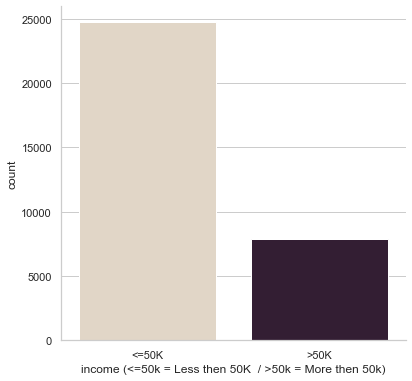

In [10]:
sns.catplot(x="income", kind="count", palette="ch:.25",height=5.27, aspect=5.7/5.27, data = data);
plt.xlabel("income (<=50k = Less then 50K  / >50k = More then 50k)")
plt.show()

# explanatory variable - continuous - age - fnlwgt - education.num - capital.gain - capital.loss - hours.per.week

In [11]:
dataset_numeric = data.describe()
dataset_numeric

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

## age

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


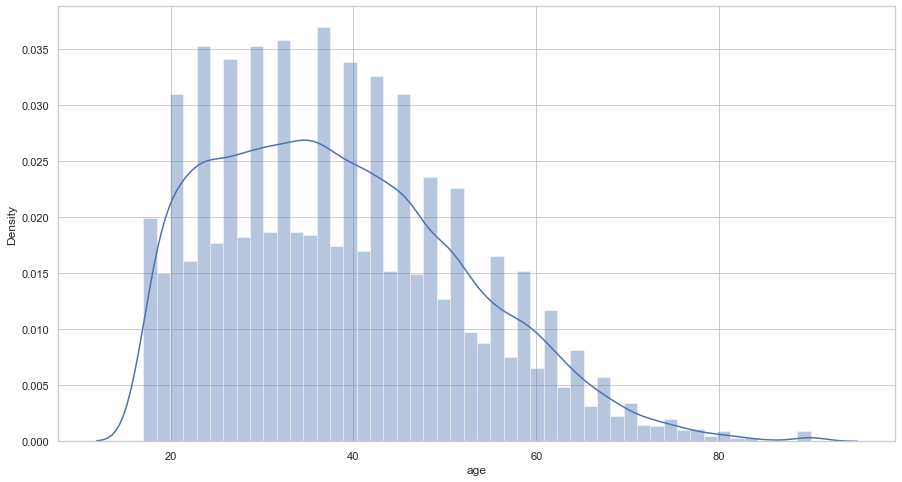

In [12]:
plt.figure(figsize=(15,8))
sns.distplot(data['age']);

## fnlwgt

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


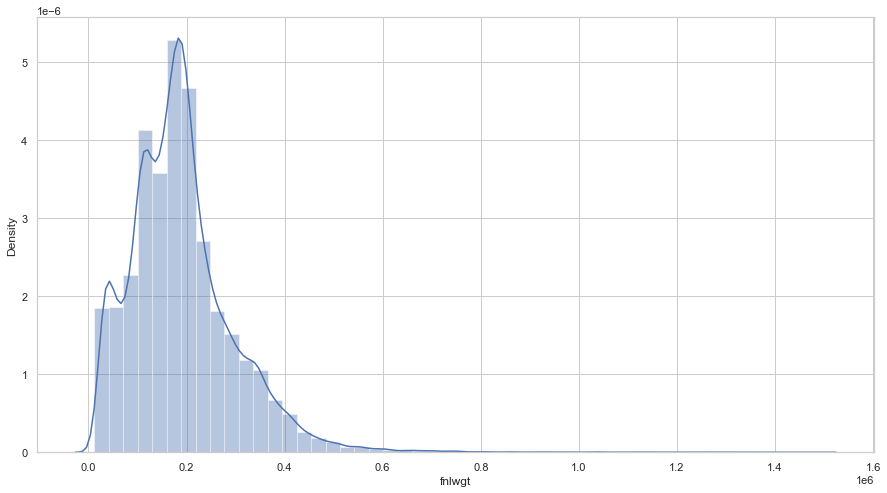

In [13]:
plt.figure(figsize=(15,8))
sns.distplot(data['fnlwgt']);

## education.num

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


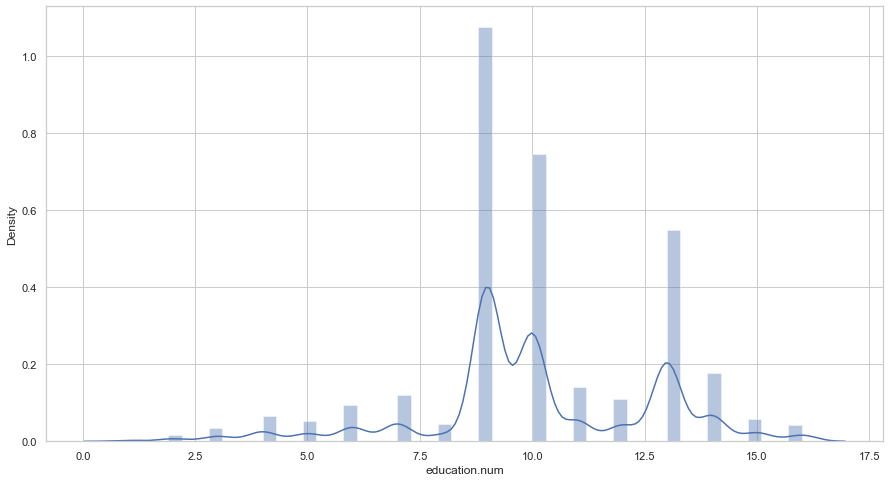

In [14]:
plt.figure(figsize=(15,8))
sns.distplot(data['education.num']);

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


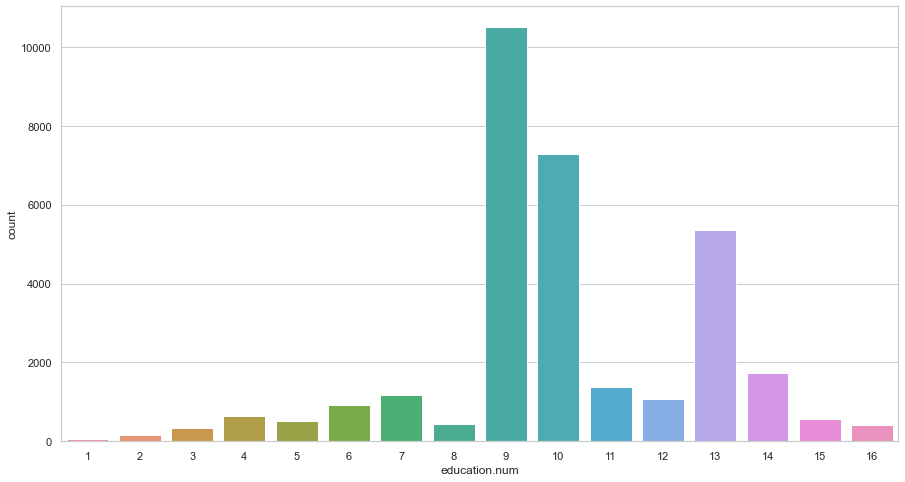

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(data['education.num']);

## capital.gain

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


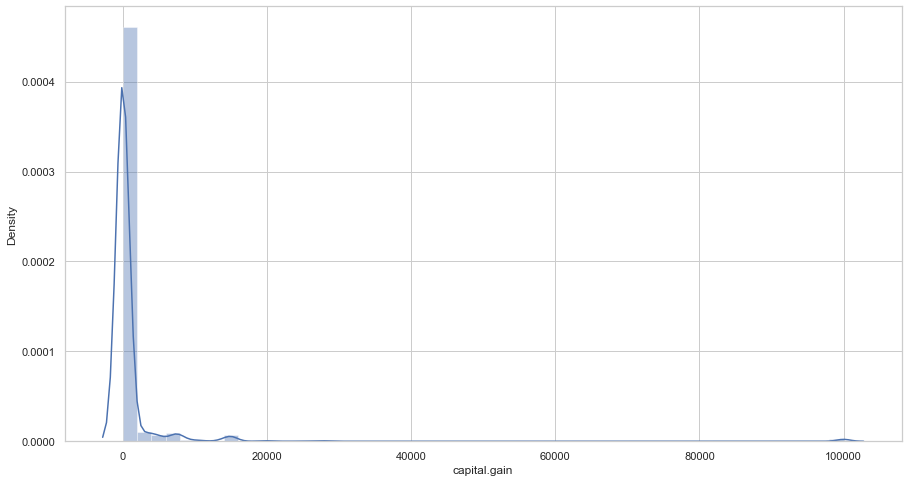

In [16]:
plt.figure(figsize=(15,8))
sns.distplot(data['capital.gain']);

## capital.loss

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


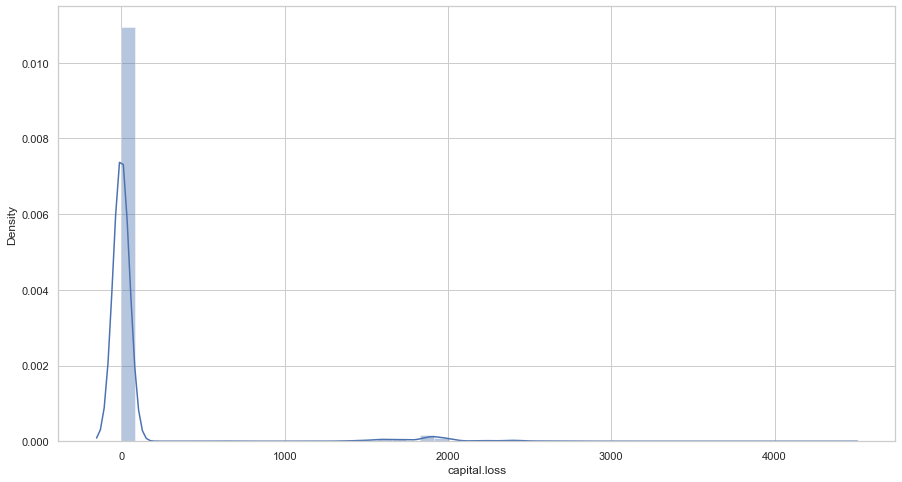

In [17]:
plt.figure(figsize=(15,8))
sns.distplot(data['capital.loss']);

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


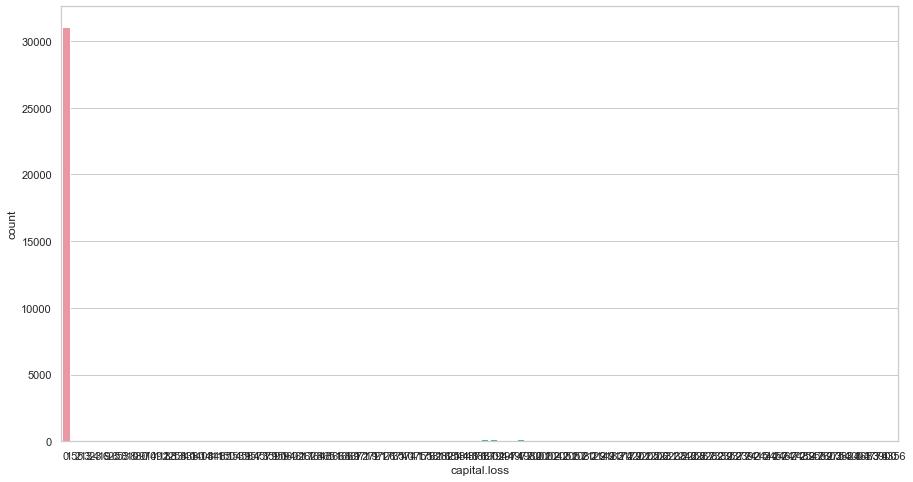

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(data['capital.loss']);

## hours.per.week

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


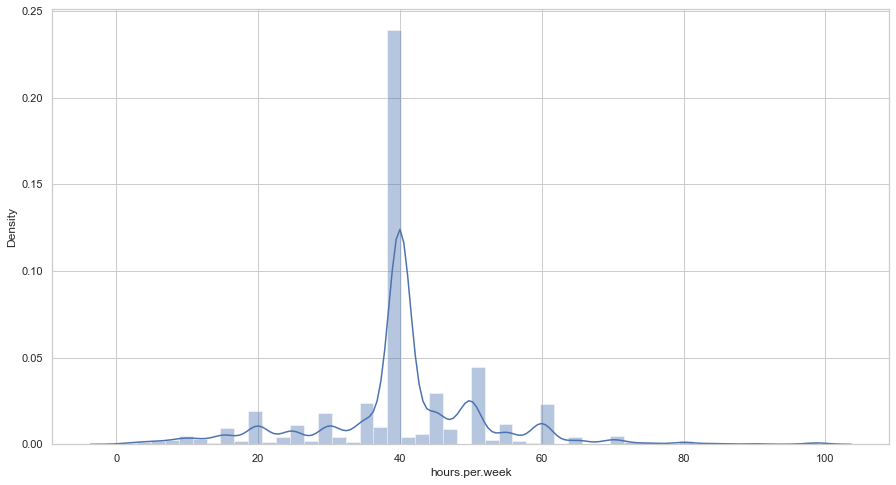

In [19]:
plt.figure(figsize=(15,8))
sns.distplot(data['hours.per.week']);

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

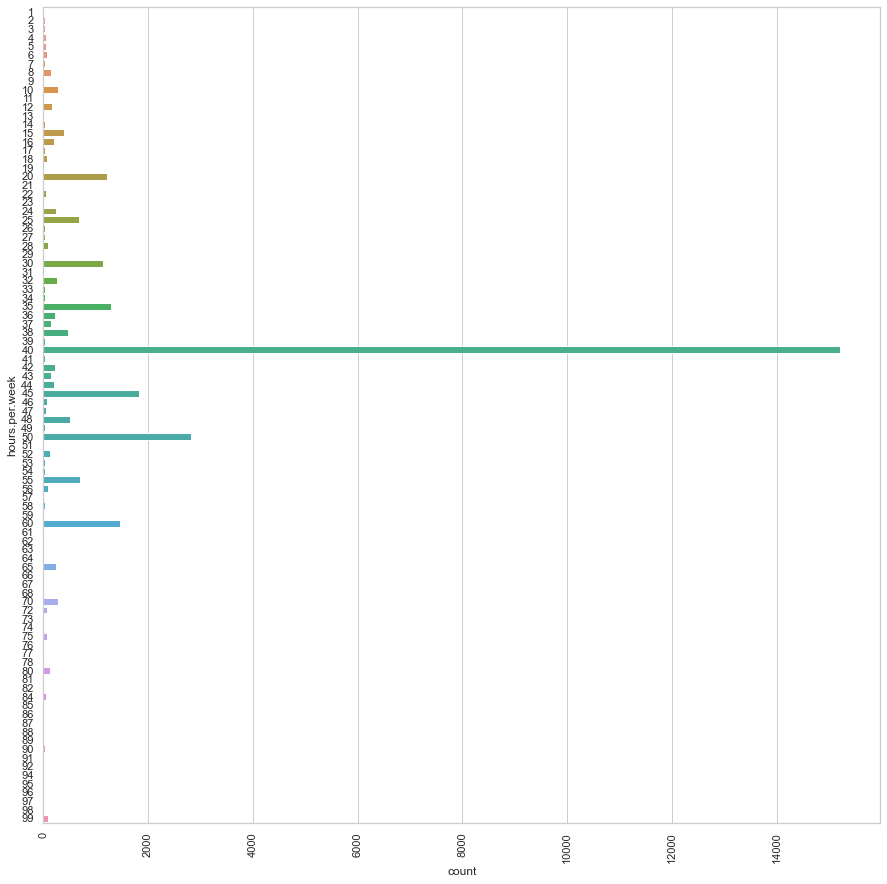

In [20]:
plt.figure(figsize=(15,15))
sns.countplot(y=data['hours.per.week']);
plt.xticks(rotation=90)

In [21]:
target=data['income']
target


0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557    <=50K
32558     >50K
32559    <=50K
32560    <=50K
Name: income, Length: 32561, dtype: object

In [22]:
from collections import Counter
from matplotlib import pyplot



In [23]:
target = data.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=<=50K, Count=24720, Percentage=75.919%
Class=>50K, Count=7841, Percentage=24.081%


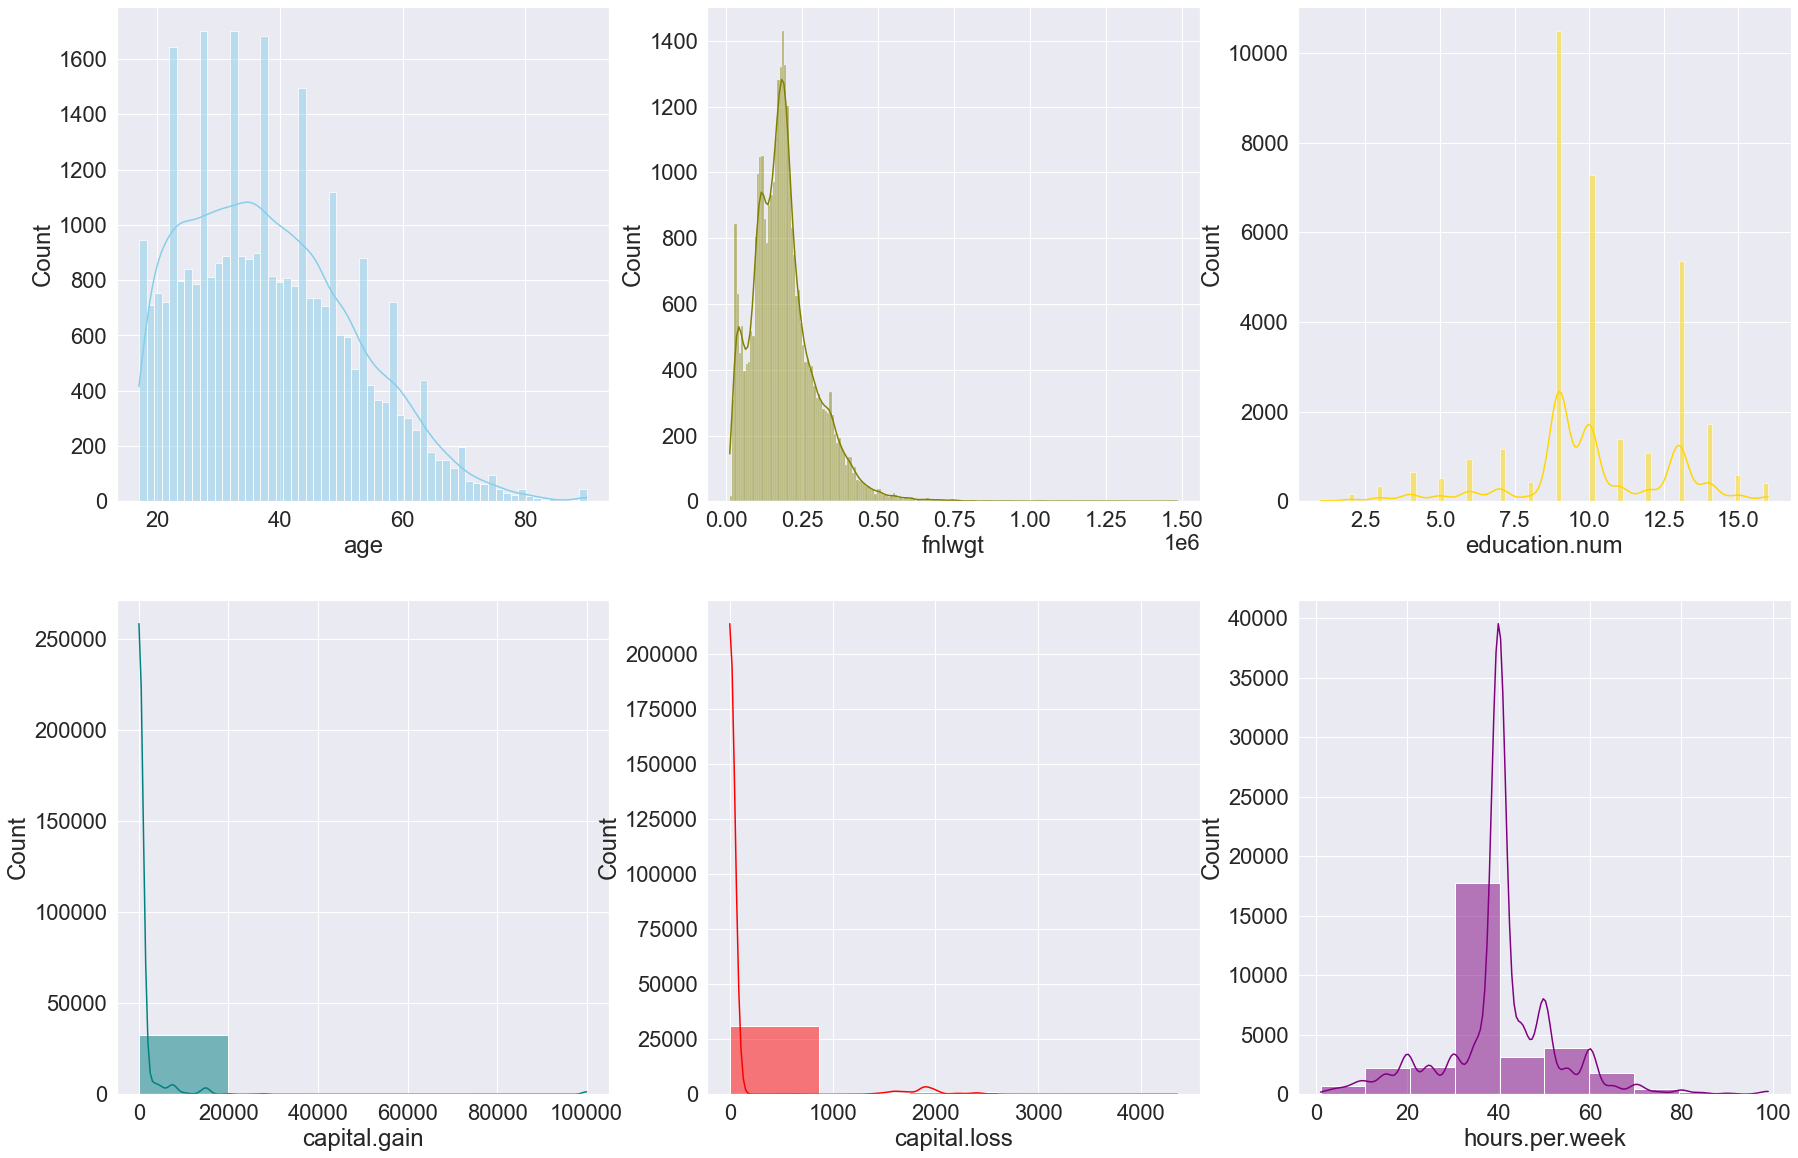

In [24]:
st = sns.axes_style("darkgrid")
sns.set(font_scale=2)

fig, axs = plt.subplots(2,3, figsize=(30,20))
sns.histplot(data=data, x="age", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=data, x="fnlwgt", kde=True, color="olive", ax=axs[0,1])
sns.histplot(data=data, x="education.num", kde=True, color="gold", ax=axs[0,2])
sns.histplot(data=data, x="capital.gain", kde=True, color="teal", ax=axs[1, 0], bins=5)
sns.histplot(data=data, x="capital.loss", kde=True, color="red", ax=axs[1, 1],bins=5)
sns.histplot(data=data, x="hours.per.week", kde=True, color="purple", ax=axs[1, 2],bins=10)


plt.show()



# Data Skewness

In [25]:
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
# If the skewness is between -1 and – 0.5 or between 0.5 and 1, 
# the data are moderately skewed. If the skewness is less than -1 or greater 
# than 1, the data are highly skewed.

In [26]:
data.skew() 

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
dtype: float64

## Correlation matrix

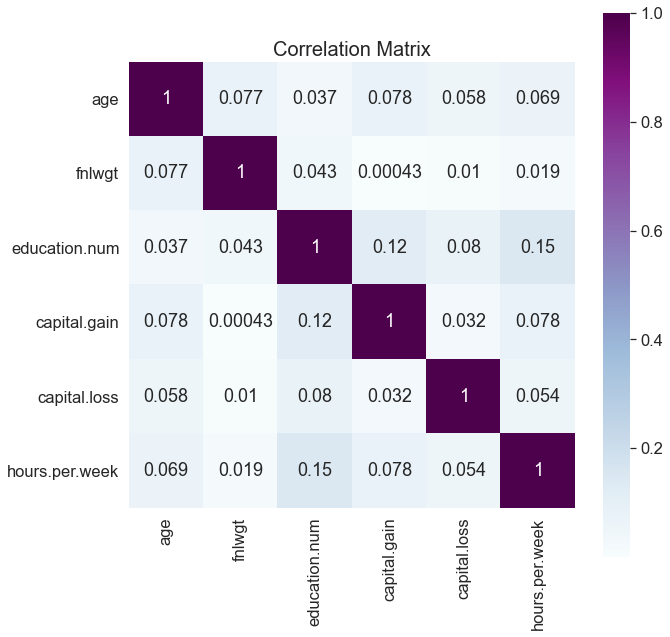

In [27]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(10,10))
corr = data.corr().abs()
sns.heatmap(corr,annot = True, mask=np.zeros_like(corr, dtype=np.bool),  cmap='BuPu',
            square=True, ax=ax )
plt.title('Correlation Matrix', fontsize=20)
plt.show()

# explanatory variable - category: workclass - education - marital.status- occupation - relationship - race - sex - native.country - education

In [28]:
dataset_nunnumeric = data.describe(include=['O'])
dataset_nunnumeric

workclass education      marital.status      occupation relationship  \
count      30725     32561               32561           30718        32561   
unique         8        16                   7              14            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22696     10501               14976            4140        13193   

         race    sex native.country income  
count   32561  32561          31978  32561  
unique      5      2             41      2  
top     White   Male  United-States  <=50K  
freq    27816  21790          29170  24720

# workclass

In [29]:
frequency_Var = data['workclass'].value_counts()
frequency_Var

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [30]:
percentage_Var = data['workclass'].value_counts(normalize =True)*100
percentage_Var

Private             73.868186
Self-emp-not-inc     8.270138
Local-gov            6.812042
State-gov            4.224573
Self-emp-inc         3.632221
Federal-gov          3.124491
Without-pay          0.045566
Never-worked         0.022783
Name: workclass, dtype: float64

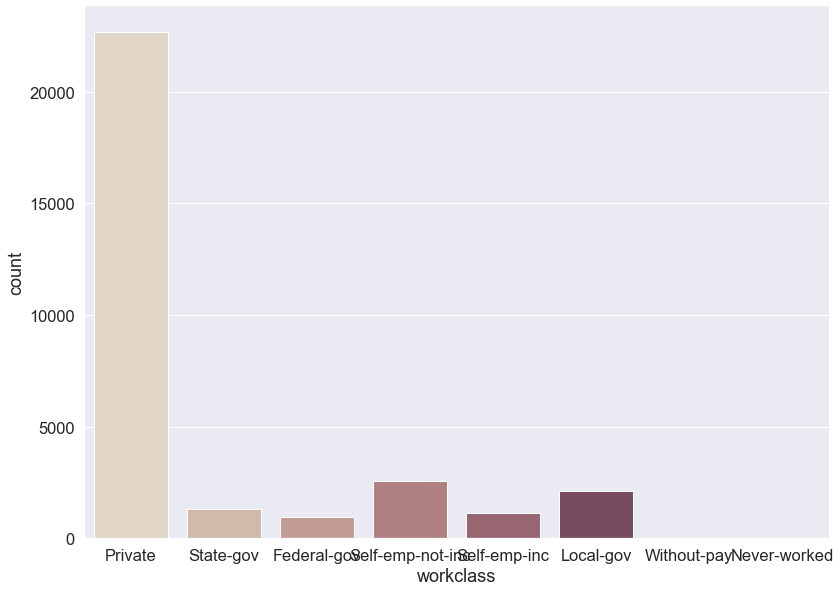

In [31]:
sns.catplot(x="workclass", kind="count", palette="ch:.25",height=8.27, aspect=11.7/8.27, data = data);
plt.xlabel("workclass")
plt.show()

# education

In [32]:
frequency_Var = data['education'].value_counts()
frequency_Var

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [33]:
percentage_Var = data['education'].value_counts(normalize =True)*100
percentage_Var

HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Assoc-voc        4.244341
11th             3.608612
Assoc-acdm       3.276926
10th             2.865391
7th-8th          1.983969
Prof-school      1.768987
9th              1.578576
12th             1.329812
Doctorate        1.268389
5th-6th          1.022696
1st-4th          0.515955
Preschool        0.156629
Name: education, dtype: float64

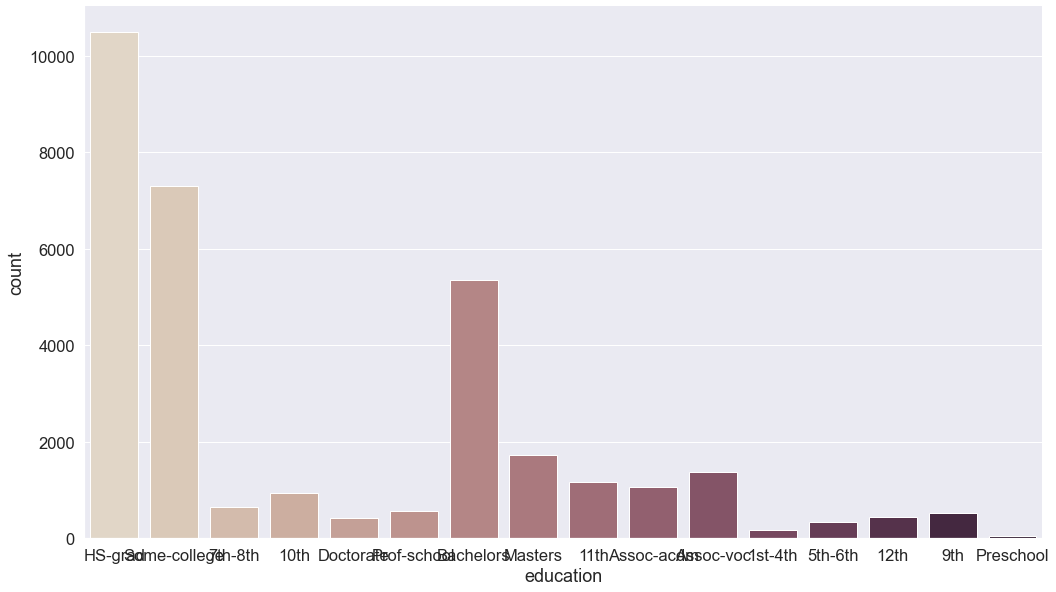

In [34]:
sns.catplot(x="education", kind="count", palette="ch:.25",height=8.27, aspect=14.7/8.27, data = data);
plt.xlabel("education")
plt.show()

# marital.status

In [35]:
frequency_Var = data['marital.status'].value_counts()
frequency_Var

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [36]:
percentage_Var = data['marital.status'].value_counts(normalize =True)*100
percentage_Var

Married-civ-spouse       45.993673
Never-married            32.809189
Divorced                 13.645158
Separated                 3.147938
Widowed                   3.049661
Married-spouse-absent     1.283744
Married-AF-spouse         0.070637
Name: marital.status, dtype: float64

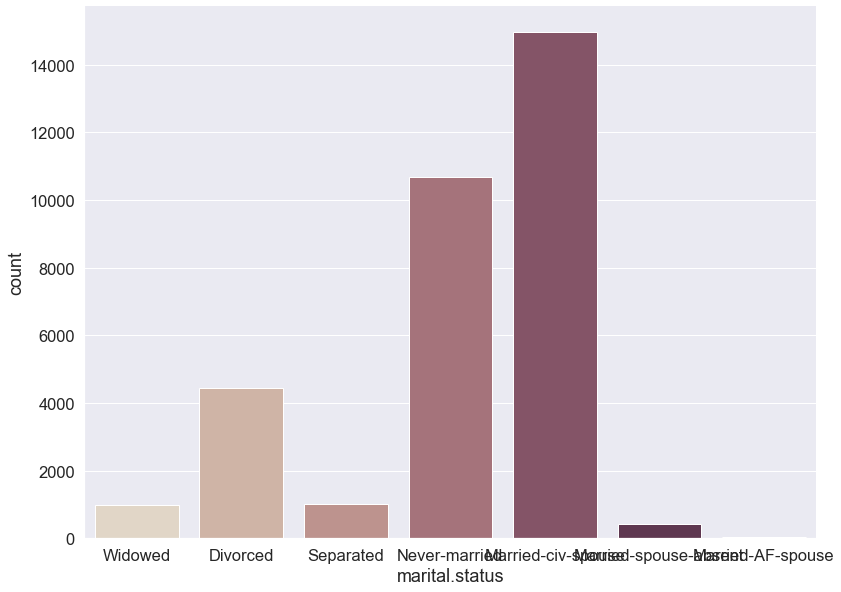

In [37]:
sns.catplot(x="marital.status", kind="count", palette="ch:.25",height=8.27, aspect=11.7/8.27, data = data);
plt.xlabel("marital.status")
plt.show()

# occupation

In [38]:
frequency_Var = data['occupation'].value_counts()
frequency_Var

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [39]:
percentage_Var = data['occupation'].value_counts(normalize =True)*100
percentage_Var

Prof-specialty       13.477440
Craft-repair         13.343968
Exec-managerial      13.236539
Adm-clerical         12.272934
Sales                11.882284
Other-service        10.726610
Machine-op-inspct     6.517351
Transport-moving      5.198906
Handlers-cleaners     4.459926
Farming-fishing       3.235888
Tech-support          3.021030
Protective-serv       2.112768
Priv-house-serv       0.485058
Armed-Forces          0.029299
Name: occupation, dtype: float64

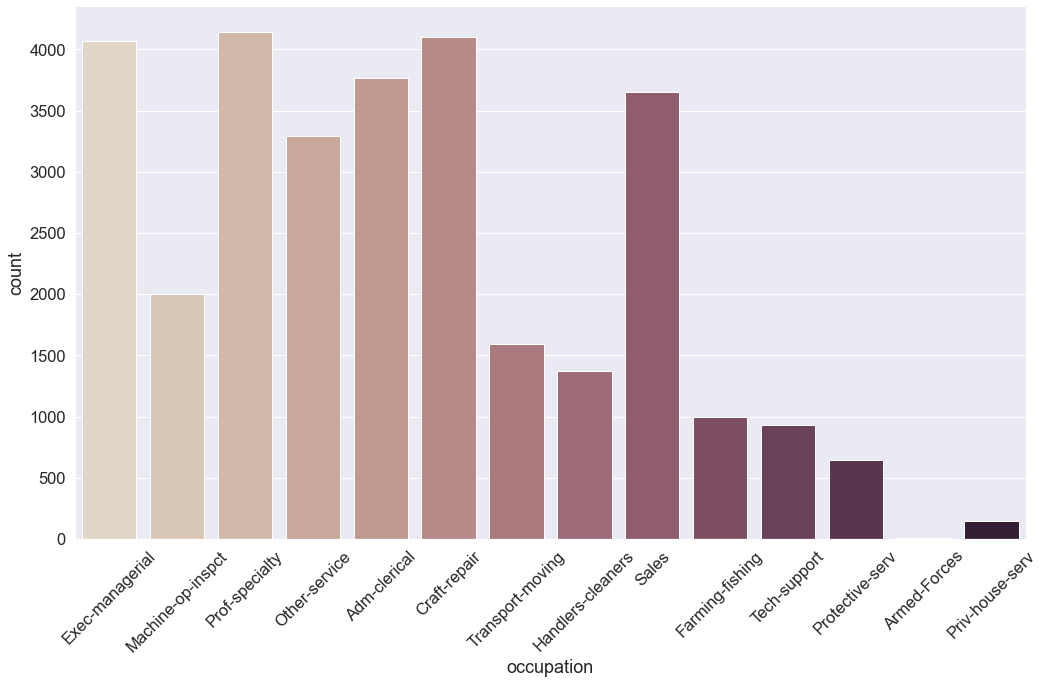

In [40]:
sns.catplot(x="occupation", kind="count", palette="ch:.25",height=8.27, aspect=14.7/8.27, data = data);
plt.xlabel("occupation")
plt.xticks(rotation=45)
plt.show()

# relationship

In [41]:
frequency_Var = data['relationship'].value_counts()
frequency_Var

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [42]:
percentage_Var = data['relationship'].value_counts(normalize =True)*100
percentage_Var

Husband           40.517797
Not-in-family     25.505973
Own-child         15.564633
Unmarried         10.583213
Wife               4.815577
Other-relative     3.012807
Name: relationship, dtype: float64

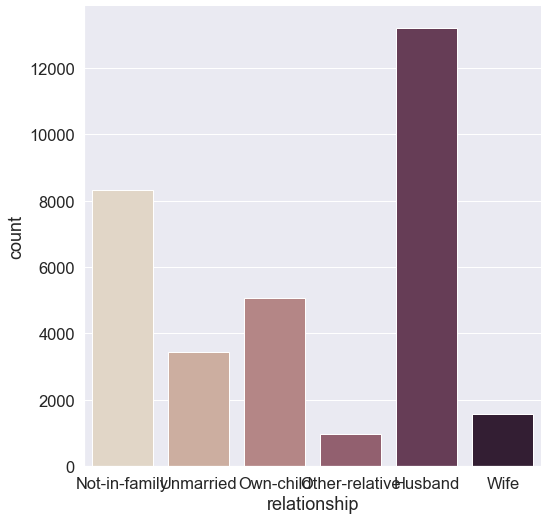

In [43]:
sns.catplot(x="relationship", kind="count", palette="ch:.25",height=7.27, aspect=8.7/8.27, data = data);
plt.xlabel("relationship")
plt.show()

# race

In [44]:
frequency_Var = data['race'].value_counts()
frequency_Var

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [45]:
percentage_Var = data['race'].value_counts(normalize =True)*100
percentage_Var

White                 85.427352
Black                  9.594300
Asian-Pac-Islander     3.190934
Amer-Indian-Eskimo     0.955130
Other                  0.832284
Name: race, dtype: float64

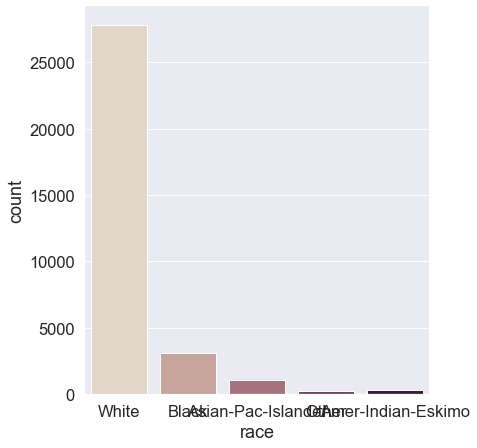

In [46]:
sns.catplot(x="race", kind="count", palette="ch:.25",height=6.27, aspect=8.7/8.27, data = data);
plt.xlabel("race")
plt.show()

# sex

In [47]:
frequency_Var = data['sex'].value_counts()
frequency_Var

Male      21790
Female    10771
Name: sex, dtype: int64

In [48]:
percentage_Var = data['sex'].value_counts(normalize =True)*100
percentage_Var

Male      66.920549
Female    33.079451
Name: sex, dtype: float64

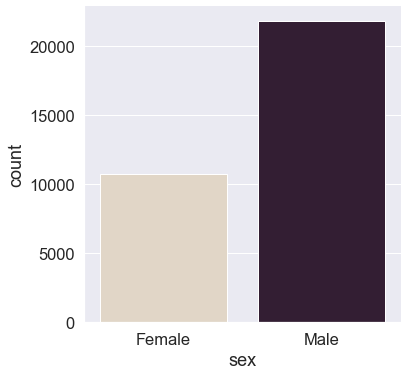

In [49]:
sns.catplot(x="sex", kind="count", palette="ch:.25",height=5.27, aspect=5.7/5.27, data = data);
plt.xlabel("sex")
plt.show()

# native.country

In [50]:
frequency_Var = data['native.country'].value_counts()
frequency_Var

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [51]:
percentage_Var = data['native.country'].value_counts(normalize =True)*100
percentage_Var

United-States                 91.218963
Mexico                         2.010757
Philippines                    0.619176
Germany                        0.428420
Canada                         0.378385
Puerto-Rico                    0.356495
El-Salvador                    0.331478
India                          0.312715
Cuba                           0.297079
England                        0.281443
Jamaica                        0.253299
South                          0.250172
China                          0.234536
Italy                          0.228282
Dominican-Republic             0.218900
Vietnam                        0.209519
Guatemala                      0.200138
Japan                          0.193883
Poland                         0.187629
Columbia                       0.184502
Taiwan                         0.159485
Haiti                          0.137595
Iran                           0.134467
Portugal                       0.115705
Nicaragua                      0.106323


# education

In [52]:
frequency_Var = data['education.num'].value_counts()
frequency_Var

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

In [53]:
percentage_Var = data['education.num'].value_counts(normalize =True)*100
percentage_Var

9     32.250238
10    22.391818
13    16.446055
14     5.291607
11     4.244341
7      3.608612
12     3.276926
6      2.865391
4      1.983969
15     1.768987
5      1.578576
8      1.329812
16     1.268389
3      1.022696
2      0.515955
1      0.156629
Name: education.num, dtype: float64

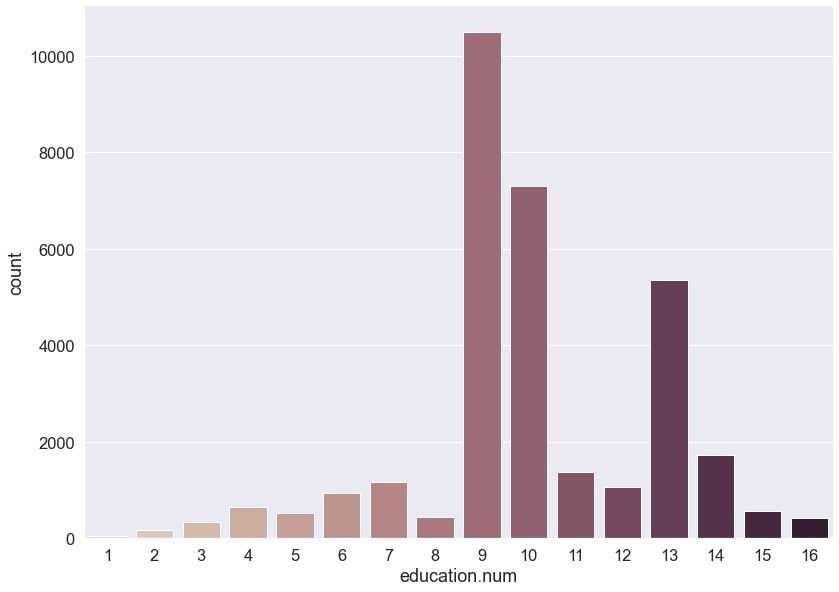

In [54]:
sns.catplot(x="education.num", kind="count", palette="ch:.25",height=8.27, aspect=11.7/8.27, data = data);
plt.xlabel("education.num")
plt.show()

# category by y 

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'State-gov'),
  Text(2, 0, 'Federal-gov'),
  Text(3, 0, 'Self-emp-not-inc'),
  Text(4, 0, 'Self-emp-inc'),
  Text(5, 0, 'Local-gov'),
  Text(6, 0, 'Without-pay'),
  Text(7, 0, 'Never-worked')])

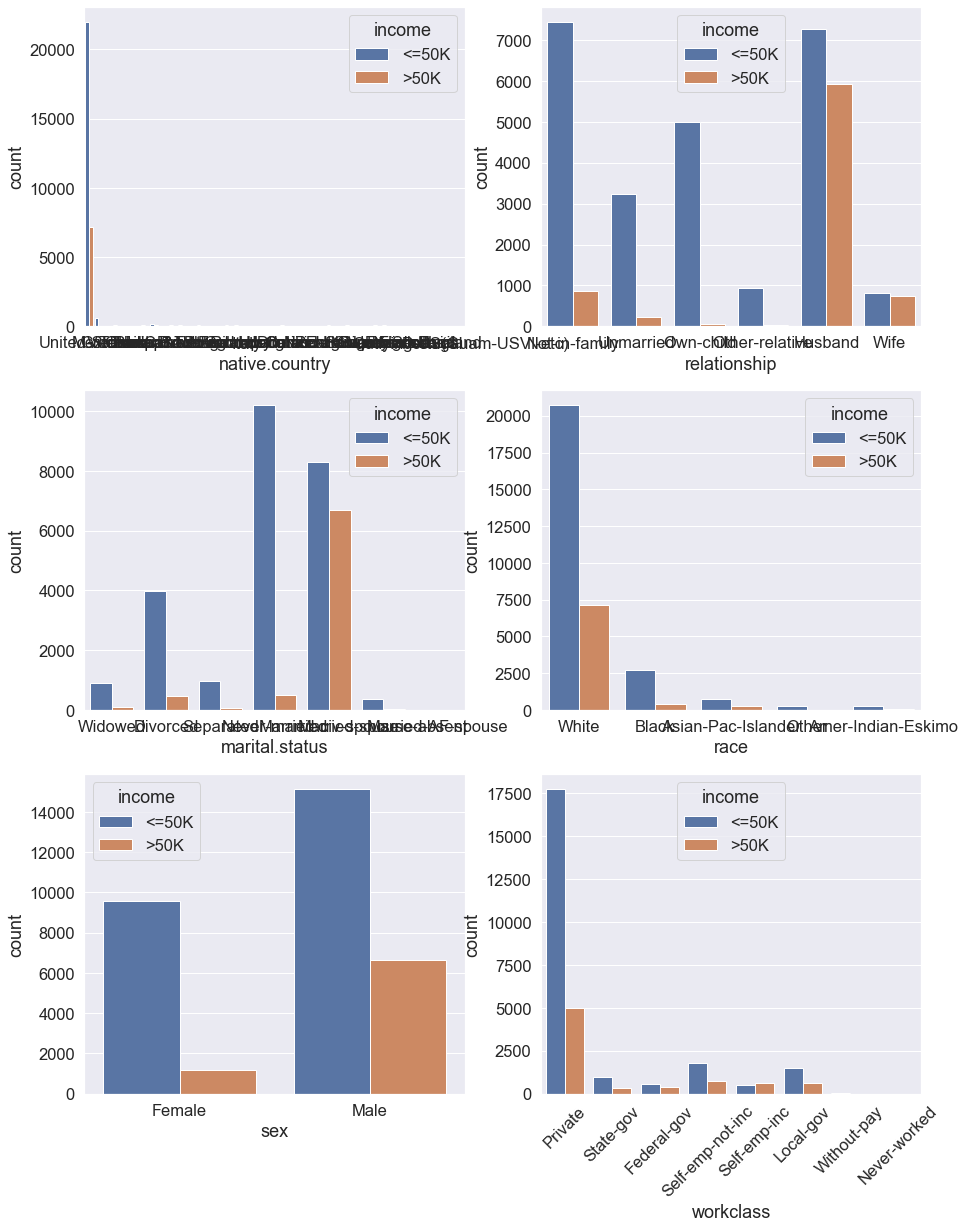

In [55]:
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(15,20))
sns.countplot(data['workclass'],hue=data['income'],ax=f)
sns.countplot(data['relationship'],hue=data['income'],ax=b)
sns.countplot(data['marital.status'],hue=data['income'],ax=c)
sns.countplot(data['race'],hue=data['income'],ax=d)
sns.countplot(data['sex'],hue=data['income'],ax=e)
sns.countplot(data['native.country'],hue=data['income'],ax=a)
plt.xticks(rotation=45)

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

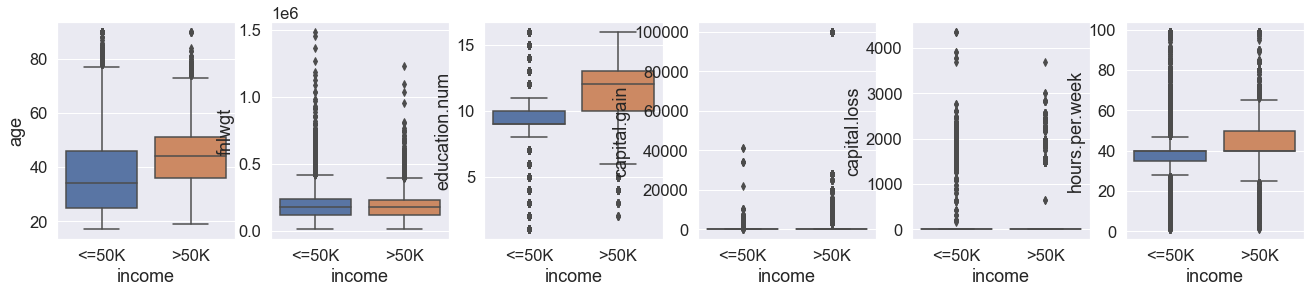

In [56]:
sns.set(font_scale=1.5)
plt.subplots(figsize=(30,4))
for i,col in enumerate(dataset_numeric):
    plt.subplot(1,len(dataset_numeric),i+1)
    sns.boxplot(data['income'],data[col])
    


# convert y to 0 or 1

In [57]:
data['income']= data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
data.sample(5)

age workclass  fnlwgt     education  education.num      marital.status  \
13592   48   Private  232840  Some-college             10             Widowed   
2050    54   Private  104501  Some-college             10  Married-civ-spouse   
31944   21   Private  224640  Some-college             10       Never-married   
6001    34   Private  126838       HS-grad              9  Married-civ-spouse   
29215   19   Private   55284       HS-grad              9       Never-married   

              occupation relationship   race     sex  capital.gain  \
13592       Adm-clerical    Unmarried  White  Female             0   
2050               Sales      Husband  White    Male         15024   
31944              Sales    Own-child  White  Female             0   
6001    Transport-moving      Husband  White    Male             0   
29215  Handlers-cleaners    Own-child  White  Female             0   

       capital.loss  hours.per.week native.country  income  
13592             0              43  United-States       0  
2050              0              40  United-States       1  
31944             0              40  United-States       0  
6001              0              40  United-States       0  
29215             0              25  United-States       0

# # relationships and correlations

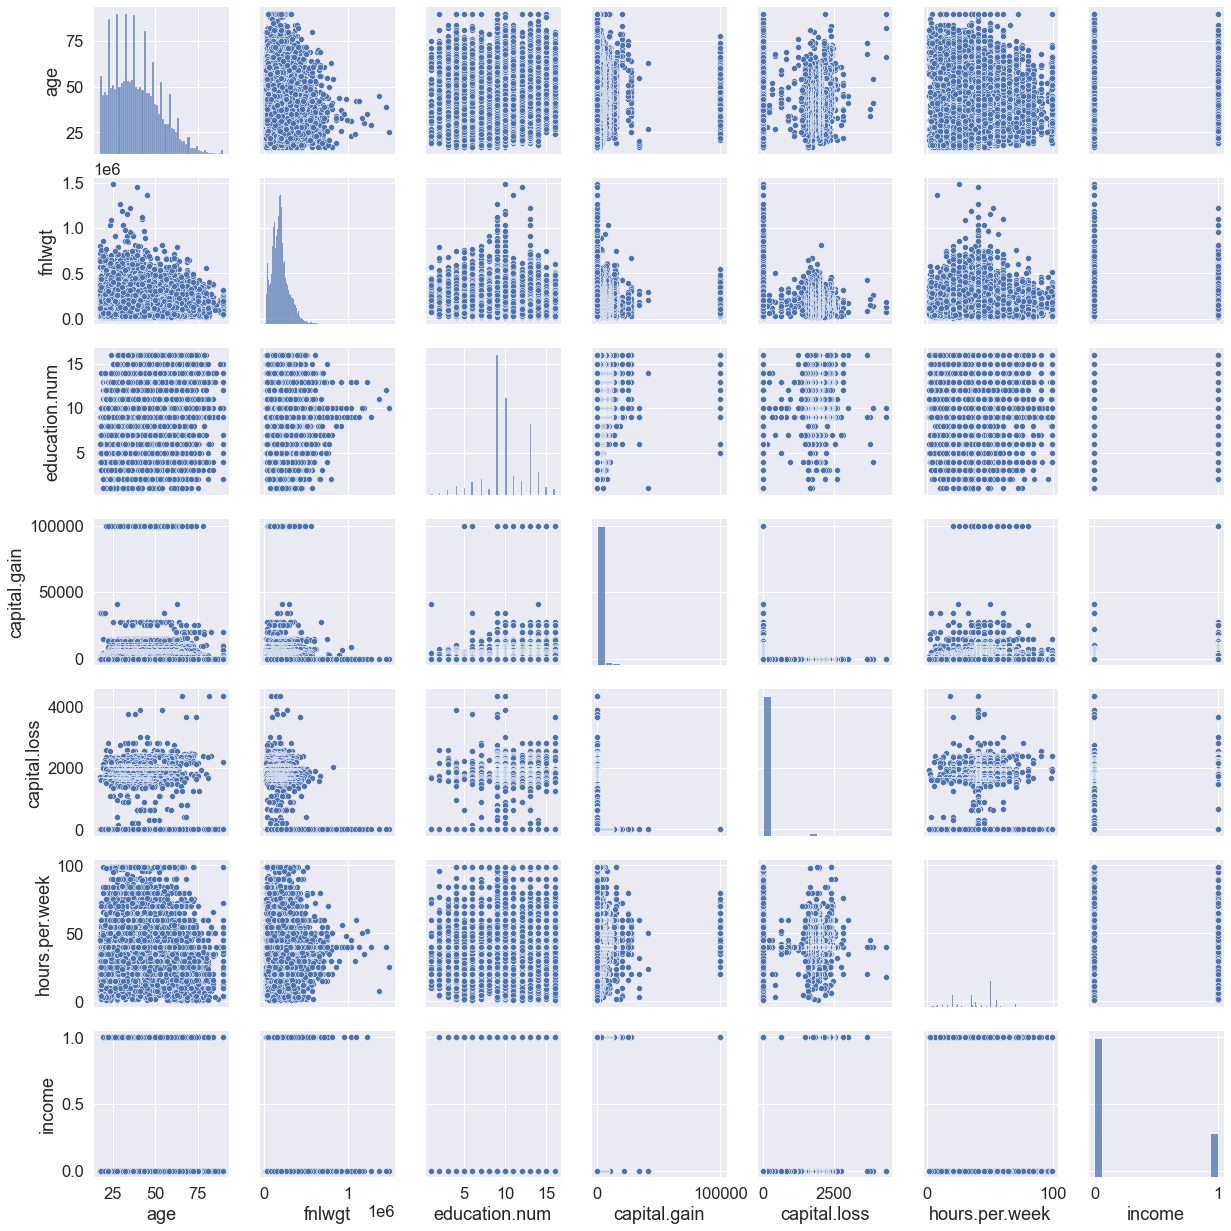

In [58]:
sns.pairplot(data) 

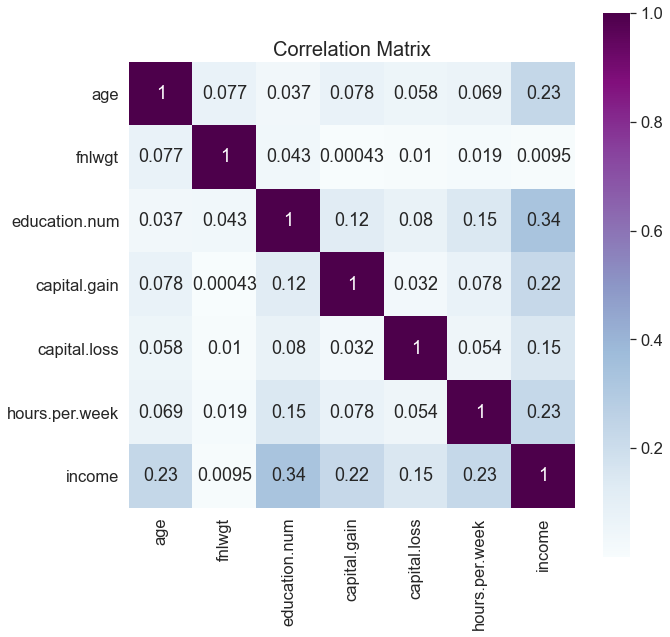

In [59]:
#plt.rcParams['figure.figsize'] = [10,7]
#sns.heatmap(data.corr(), annot = True, color = 'blue', cmap = 'YlGn');

sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(10,10))
corr = data.corr().abs()
sns.heatmap(corr,annot = True, mask=np.zeros_like(corr, dtype=np.bool),  cmap='BuPu',
            square=True, ax=ax )
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [60]:
#data['income']= data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
#data.sample(5)

## category var

In [61]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [62]:
workclass_c = pd.crosstab(data['income'],data['workclass'])


In [63]:
race_c = pd.crosstab(data['income'],data['race'])
race_c

race    Amer-Indian-Eskimo  Asian-Pac-Islander  Black  Other  White
income                                                             
0                      275                 763   2737    246  20699
1                       36                 276    387     25   7117

In [64]:
education_c = pd.crosstab(data['income'],data['education'])
education_c

education  10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  \
income                                                                    
0           871  1115   400      162      317      606  487         802   
1            62    60    33        6       16       40   27         265   

education  Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  Preschool  \
income                                                                    
0               1021       3134        107     8826      764         51   
1                361       2221        306     1675      959          0   

education  Prof-school  Some-college  
income                                
0                  153          5904  
1                  423          1387

In [65]:
maritalstatus_c = pd.crosstab(data['income'],data['marital.status'])
maritalstatus_c

marital.status  Divorced  Married-AF-spouse  Married-civ-spouse  \
income                                                            
0                   3980                 13                8284   
1                    463                 10                6692   

marital.status  Married-spouse-absent  Never-married  Separated  Widowed  
income                                                                    
0                                 384          10192        959      908  
1                                  34            491         66       85

In [66]:
occupation_c = pd.crosstab(data['income'],data['occupation'])
occupation_c

occupation  Adm-clerical  Armed-Forces  Craft-repair  Exec-managerial  \
income                                                                  
0                   3263             8          3170             2098   
1                    507             1           929             1968   

occupation  Farming-fishing  Handlers-cleaners  Machine-op-inspct  \
income                                                              
0                       879               1284               1752   
1                       115                 86                250   

occupation  Other-service  Priv-house-serv  Prof-specialty  Protective-serv  \
income                                                                        
0                    3158              148            2281              438   
1                     137                1            1859              211   

occupation  Sales  Tech-support  Transport-moving  
income                                             
0            2667           645              1277  
1             983           283               320

In [67]:
relationship_c = pd.crosstab(data['income'],data['relationship'])
relationship_c

relationship  Husband  Not-in-family  Other-relative  Own-child  Unmarried  \
income                                                                       
0                7275           7449             944       5001       3228   
1                5918            856              37         67        218   

relationship  Wife  
income              
0              823  
1              745

In [68]:
sex_c = pd.crosstab(data['income'],data['sex'])
sex_c

sex     Female   Male
income               
0         9592  15128
1         1179   6662

In [69]:
nativecountry_c = pd.crosstab(data['income'],data['native.country'])
nativecountry_c

native.country  Cambodia  Canada  China  Columbia  Cuba  Dominican-Republic  \
income                                                                        
0                     12      82     55        57    70                  68   
1                      7      39     20         2    25                   2   

native.country  Ecuador  El-Salvador  England  France  ...  Portugal  \
income                                                 ...             
0                    24           97       60      17  ...        33   
1                     4            9       30      12  ...         4   

native.country  Puerto-Rico  Scotland  South  Taiwan  Thailand  \
income                                                           
0                       102         9     64      31        15   
1                        12         3     16      20         3   

native.country  Trinadad&Tobago  United-States  Vietnam  Yugoslavia  
income                                                               
0                            17          21999       62          10  
1                             2           7171        5           6  

[2 rows x 41 columns]

In [70]:
stat, p, dof, expected = chi2_contingency(workclass_c)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=7
[[7.20976404e+02 1.57187876e+03 5.25711961e+00 1.70450838e+04
  8.38135069e+02 1.90833442e+03 9.74820179e+02 1.05142392e+01]
 [2.39023596e+02 5.21121237e+02 1.74288039e+00 5.65091619e+03
  2.77864931e+02 6.32665582e+02 3.23179821e+02 3.48576078e+00]]
probability=0.950, critical=14.067, stat=827.718
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [71]:
stat, p, dof, expected = chi2_contingency(race_c)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')
    
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=4
[[  236.10822763   788.79886981  2371.71094254   205.74060993
  21117.64135008]
 [   74.89177237   250.20113019   752.28905746    65.25939007
   6698.35864992]]
probability=0.950, critical=9.488, stat=330.920
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [72]:
stat, p, dof, expected = chi2_contingency(education_c)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=15
[[ 708.3246829   892.04877     328.72946163  127.54399435  252.81041737
   490.43702589  390.22388747  810.05620221 1049.20119161 4065.46481988
   313.54565277 7972.25883726 1308.08513252   38.71871257  437.29369491
  5535.25751666]
 [ 224.6753171   282.95123     104.27053837   40.45600565   80.18958263
   155.56297411  123.77611253  256.94379779  332.79880839 1289.53518012
    99.45434723 2528.74116274  414.91486748   12.28128743  138.70630509
  1755.74248334]]
probability=0.950, critical=24.996, stat=4429.653
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [73]:
stat, p, dof, expected = chi2_contingency(maritalstatus_c)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=6
[[3.37308314e+03 1.74613802e+01 1.13696361e+04 3.17341605e+02
  8.11043150e+03 7.78170204e+02 7.53876109e+02]
 [1.06991686e+03 5.53861982e+00 3.60636393e+03 1.00658395e+02
  2.57256850e+03 2.46829796e+02 2.39123891e+02]]
probability=0.950, critical=12.592, stat=6517.742
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [74]:
stat, p, dof, expected = chi2_contingency(occupation_c)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=13
[[2.83112052e+03 6.75864314e+00 3.07818647e+03 3.05340478e+03
  7.46454587e+02 1.02881568e+03 1.50342262e+03 2.47441435e+03
  1.11893092e+02 3.10897584e+03 4.87373266e+02 2.74100527e+03
  6.96891204e+02 1.19928368e+03]
 [9.38879484e+02 2.24135686e+00 1.02081353e+03 1.01259522e+03
  2.47545413e+02 3.41184322e+02 4.98577381e+02 8.20585650e+02
  3.71069080e+01 1.03102416e+03 1.61626734e+02 9.08994726e+02
  2.31108796e+02 3.97716323e+02]]
probability=0.950, critical=22.362, stat=3744.899
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [75]:
stat, p, dof, expected = chi2_contingency(relationship_c)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=5
[[10015.99950861  6305.07662541   744.76582415  3847.57716286
   2616.17026504  1190.41061392]
 [ 3177.00049139  1999.92337459   236.23417585  1220.42283714
    829.82973496   377.58938608]]
probability=0.950, critical=11.070, stat=6699.077
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [76]:
stat, p, dof, expected = chi2_contingency(sex_c)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=1
[[ 8177.24025675 16542.75974325]
 [ 2593.75974325  5247.24025675]]
probability=0.950, critical=3.841, stat=1517.813
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [77]:
stat, p, dof, expected = chi2_contingency(nativecountry_c)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=40
[[1.44279505e+01 9.18832635e+01 5.69524360e+01 4.48025830e+01
  7.21397523e+01 5.31556070e+01 2.12622428e+01 8.04927763e+01
  6.83429233e+01 2.20216086e+01 1.04033117e+02 2.20216086e+01
  4.85994121e+01 3.34120958e+01 7.59365814e-01 9.87175558e+00
  1.51873163e+01 9.87175558e+00 7.59365814e+01 3.26527300e+01
  1.82247795e+01 5.54337044e+01 6.15086309e+01 4.70806805e+01
  1.36685847e+01 4.88272218e+02 2.58184377e+01 1.06311214e+01
  2.35403402e+01 1.50354431e+02 4.55619488e+01 2.80965351e+01
  8.65677028e+01 9.11238977e+00 6.07492651e+01 3.87276565e+01
  1.36685847e+01 1.44279505e+01 2.21507008e+04 5.08775095e+01
  1.21498530e+01]
 [4.57204953e+00 2.91167365e+01 1.80475640e+01 1.41974170e+01
  2.28602477e+01 1.68443930e+01 6.73775721e+00 2.55072237e+01
  2.16570767e+01 6.97839139e+00 3.29668835e+01 6.97839139e+00
  1.54005879e+01 1.05879042e+01 2.40634186e-01 3.12824442e+00
  4.81268372e+00 3.12824442e+00 2.40634186e+01 1.03472700e+01
  5.77522046e+00 1.75662956e+01 1.94913691e+0

# Data Preparation

# 1. outliers # 

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

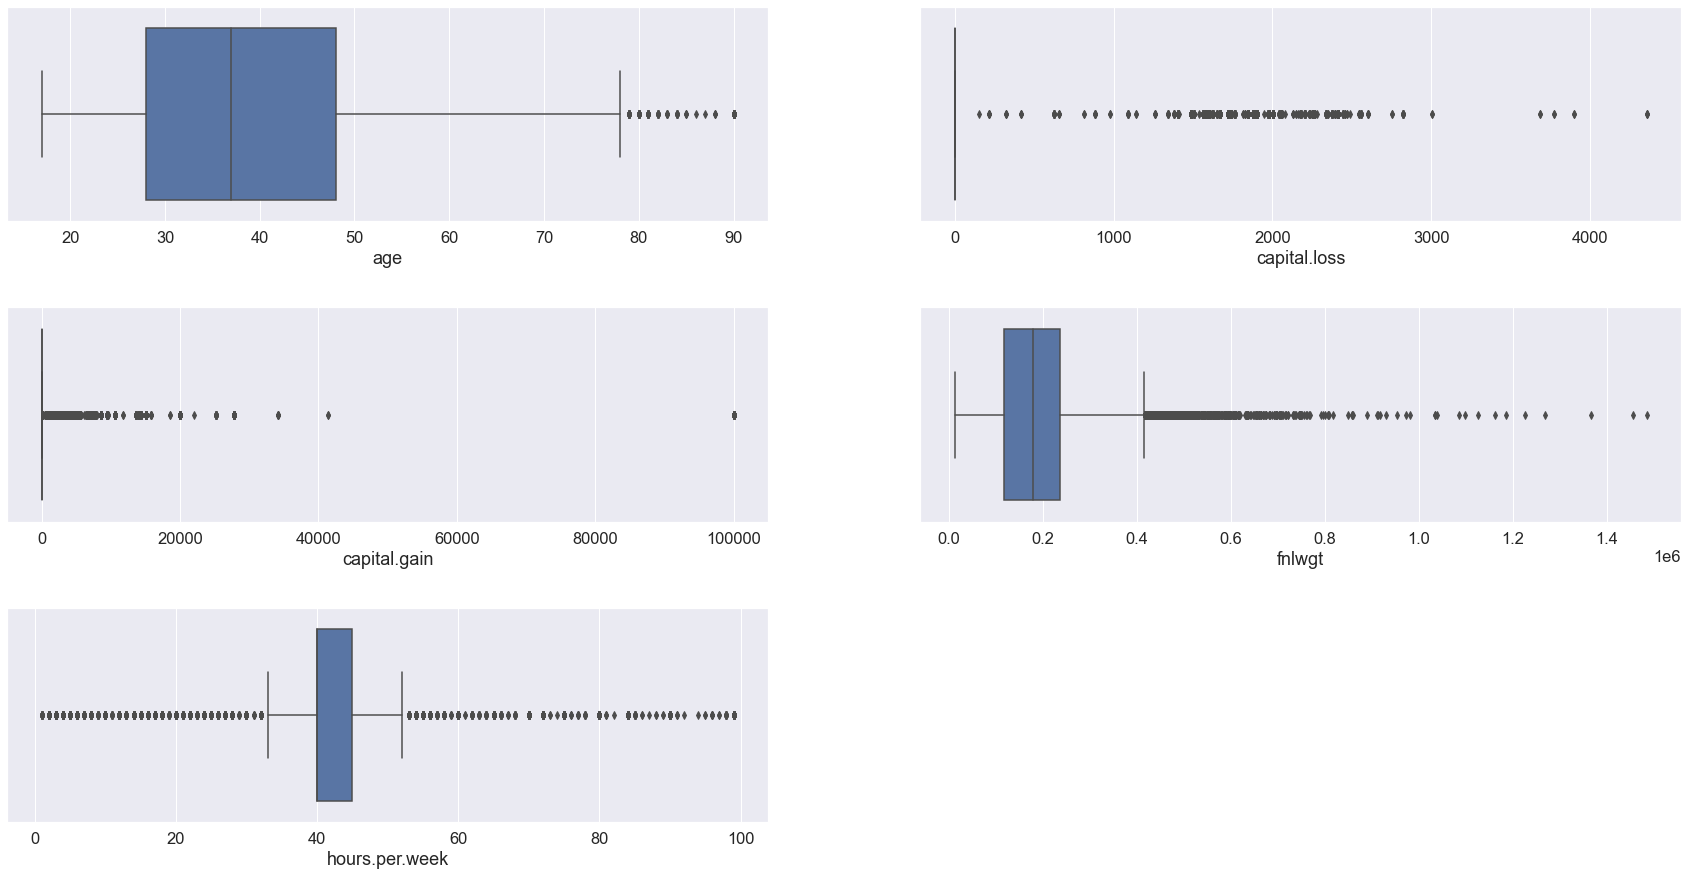

In [78]:
plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 20})
plt.subplot(321)
sns.boxplot(data["age"])
#plt.xticks(rotation=90) 

plt.subplot(322)
sns.boxplot(data["capital.loss"])
#plt.xticks(rotation=90)

plt.subplot(323)
sns.boxplot(data["capital.gain"])
#plt.xticks(rotation=90)

plt.subplot(324)
sns.boxplot(data["fnlwgt"])
#plt.xticks(rotation=90)

plt.subplot(325)
sns.boxplot(data["hours.per.week"])
#plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.4) 
plt.show()

## capital.gain and capital.loss without 0 

In [79]:
df_loss_withoutzero=data.loc[data["capital.loss"]!=0,:] 
df_loss_withoutzero.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90       NaN   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66       NaN  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                NaN  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                NaN      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country  income  
0          4356              40  United-States       0  
1          4356              18  United-States       0  
2          4356              40  United-States       0  
3          3900              40  United-States       0  
4          3900              40  United-States       0

In [80]:
df_gain_withoutzero=data.loc[data["capital.gain"]!=0,:] 
df_gain_withoutzero.head()

age     workclass  fnlwgt    education  education.num  \
1519   54  Self-emp-inc  166459  Prof-school             15   
1520   52       Private  152234      HS-grad              9   
1521   53  Self-emp-inc  263925      HS-grad              9   
1522   52       Private  118025    Bachelors             13   
1523   46       Private  370119  Prof-school             15   

          marital.status       occupation relationship                race  \
1519  Married-civ-spouse   Prof-specialty      Husband               White   
1520  Married-civ-spouse  Exec-managerial      Husband  Asian-Pac-Islander   
1521  Married-civ-spouse            Sales      Husband               White   
1522  Married-civ-spouse  Exec-managerial      Husband               White   
1523  Married-civ-spouse   Prof-specialty      Husband               White   

       sex  capital.gain  capital.loss  hours.per.week native.country  income  
1519  Male         99999             0              60  United-States       1  
1520  Male         99999             0              40          Japan       1  
1521  Male         99999             0              40  United-States       1  
1522  Male         99999             0              50  United-States       1  
1523  Male         99999             0              60  United-States       1

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

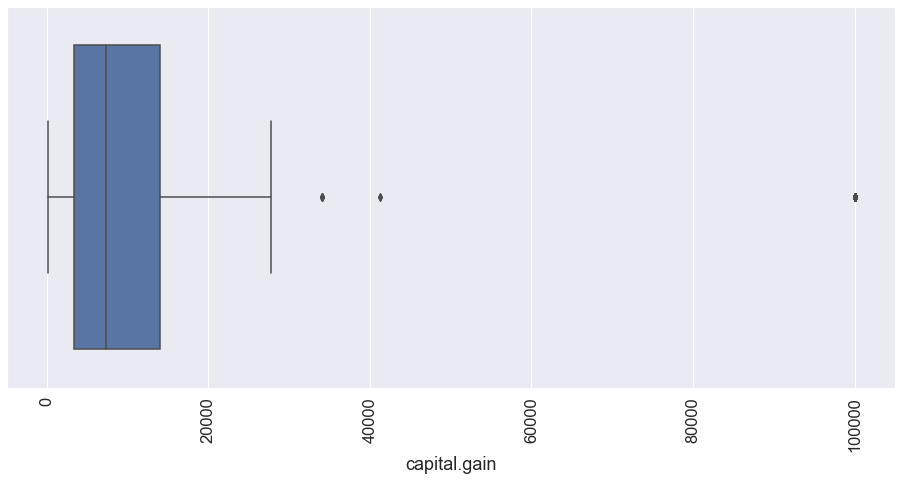

In [81]:
plt.figure(figsize=(35,7))
plt.subplot(121)
sns.boxplot(df_gain_withoutzero["capital.gain"])
plt.xticks(rotation=90) 

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

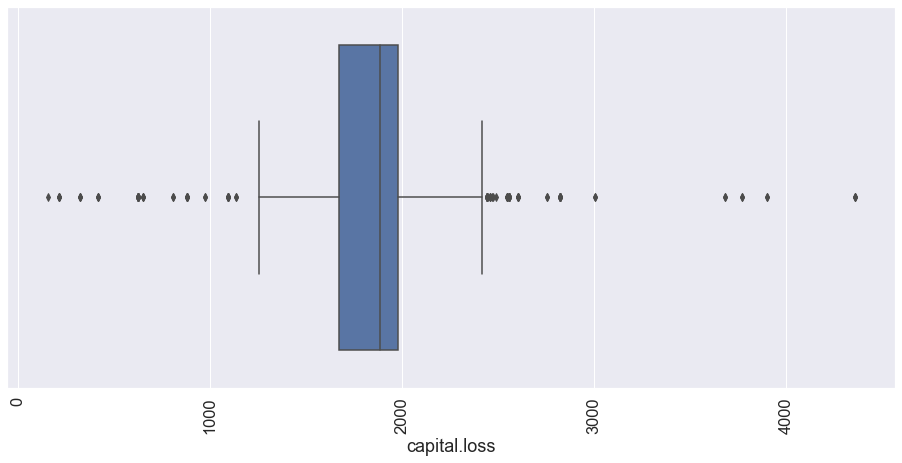

In [82]:
plt.figure(figsize=(35,7))
plt.subplot(122)
sns.boxplot(df_loss_withoutzero["capital.loss"])
plt.xticks(rotation=90)

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

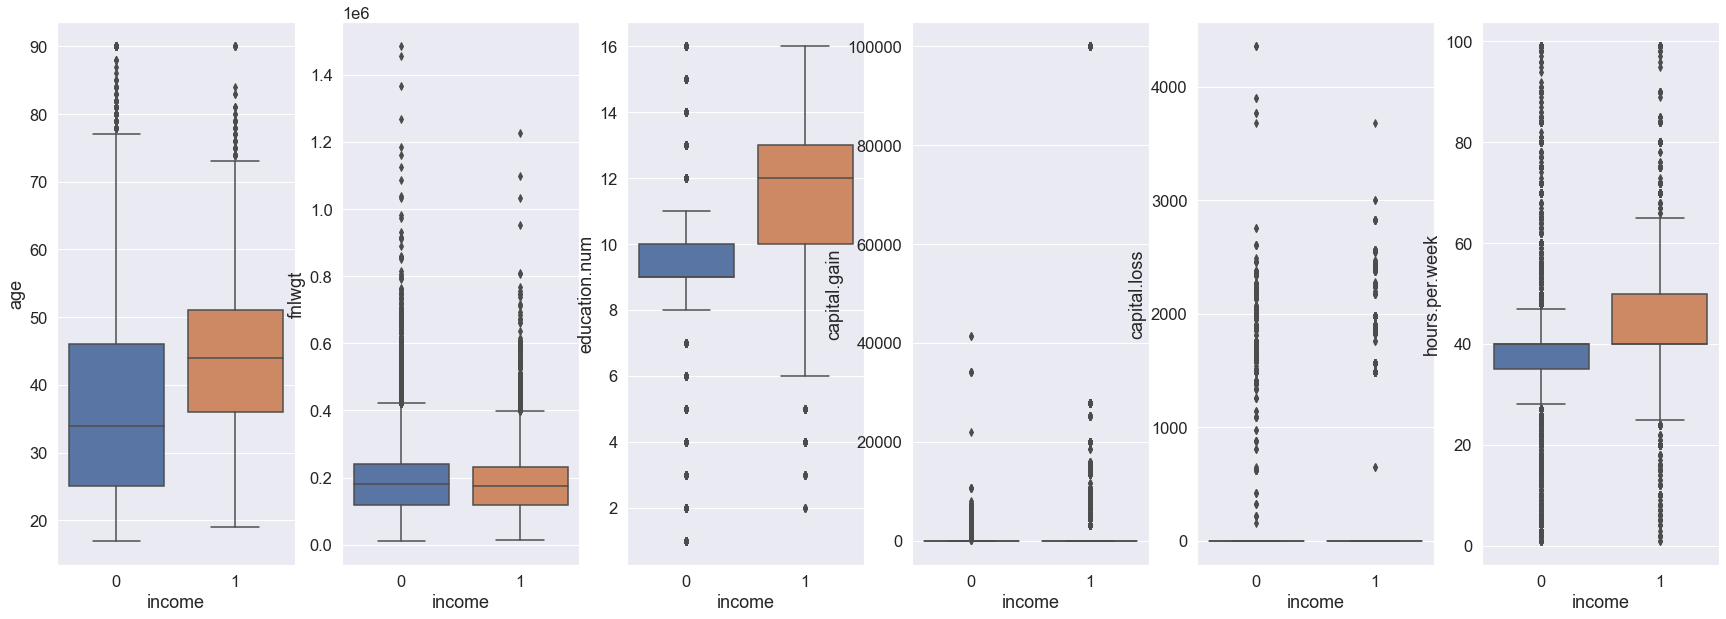

In [83]:
 plt.figure(figsize=(40,10))
 for i,col in enumerate(dataset_numeric):
    plt.subplot(1,len(dataset_numeric),i+1)
    sns.boxplot(data['income'],data[col])

# 2.Missing Values#

In [84]:
missing_data = data.isnull().sum()
missing_data

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [85]:
nan_percentage = data.isna().sum() * 100 / len(data)
missing_percentage_df = pd.DataFrame({'column_name': data.columns, 'percent_missing': nan_percentage}).reset_index(drop=True)
missing_percentage_df

column_name  percent_missing
0              age         0.000000
1        workclass         5.638647
2           fnlwgt         0.000000
3        education         0.000000
4    education.num         0.000000
5   marital.status         0.000000
6       occupation         5.660146
7     relationship         0.000000
8             race         0.000000
9              sex         0.000000
10    capital.gain         0.000000
11    capital.loss         0.000000
12  hours.per.week         0.000000
13  native.country         1.790486
14          income         0.000000

<AxesSubplot:>

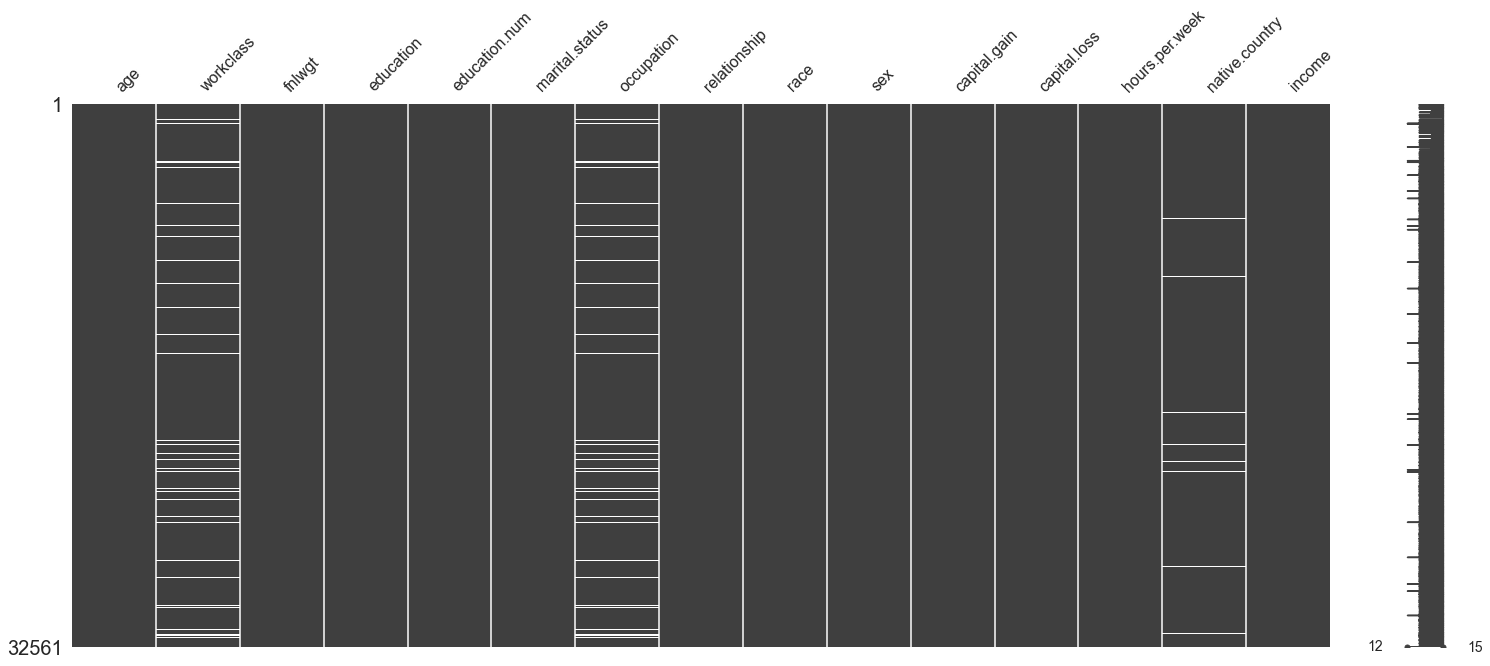

In [86]:
msno.matrix(data) 

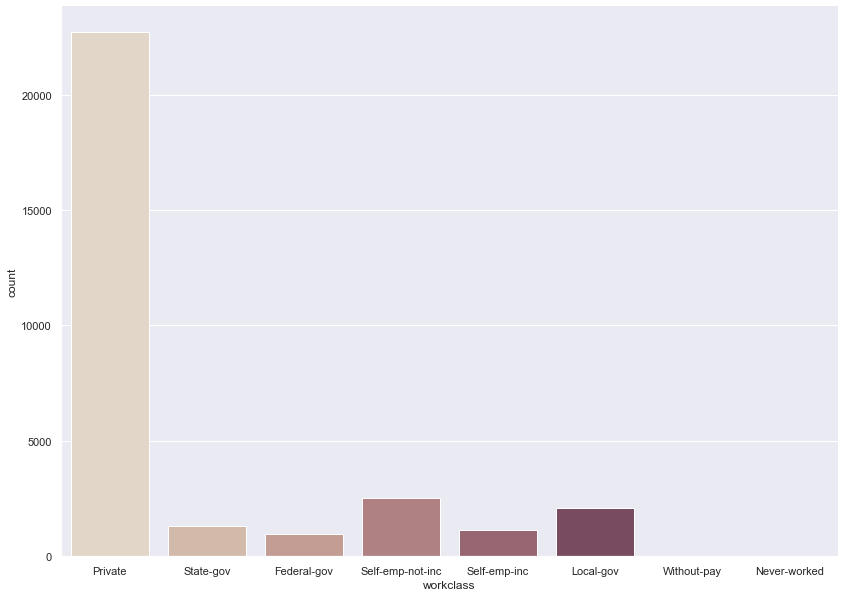

In [87]:
sns.set(font_scale=1)
sns.catplot(x="workclass", kind="count", palette="ch:.25",height=8.27, aspect=11.7/8.27, data = data);
plt.xlabel("workclass")
plt.show()

In [88]:
# option1 - delete the data - fully random and less than 5%

In [89]:
data = data.dropna(axis=0, how='any', inplace=False)

In [90]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

<AxesSubplot:>

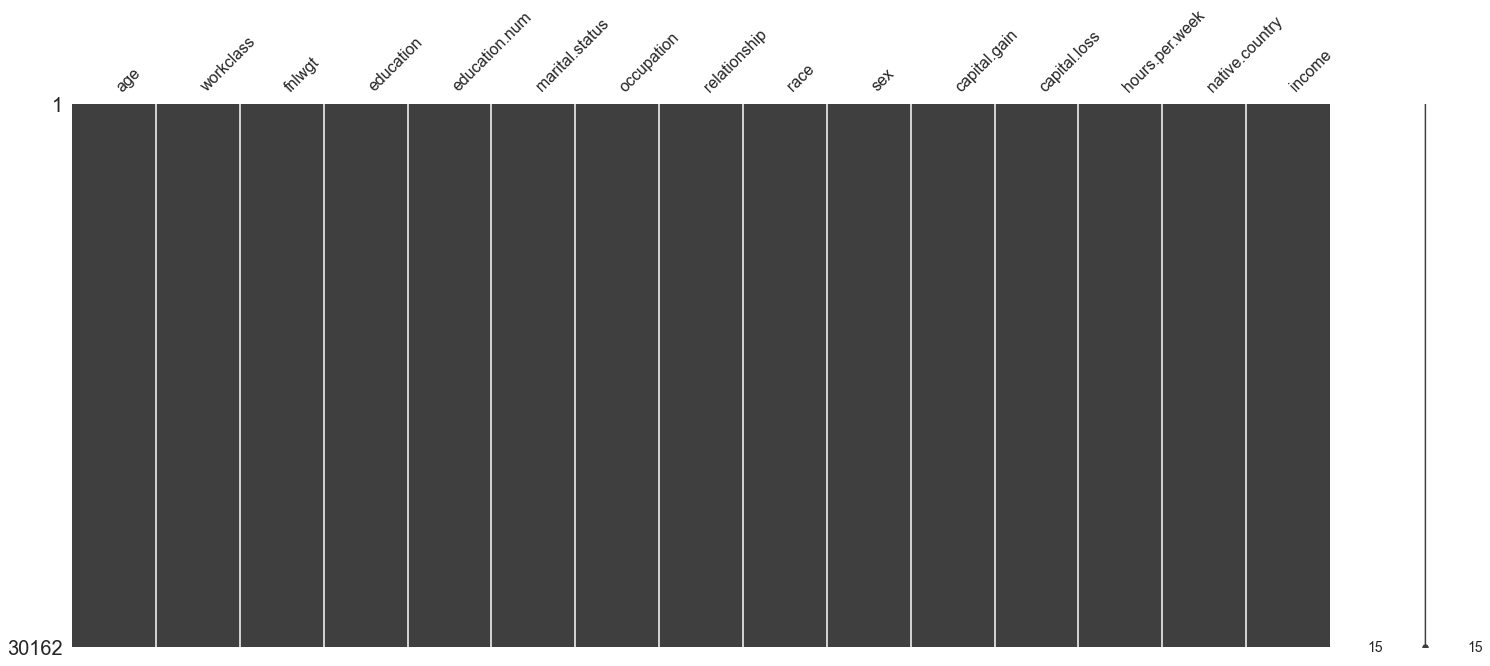

In [91]:
msno.matrix(data) 

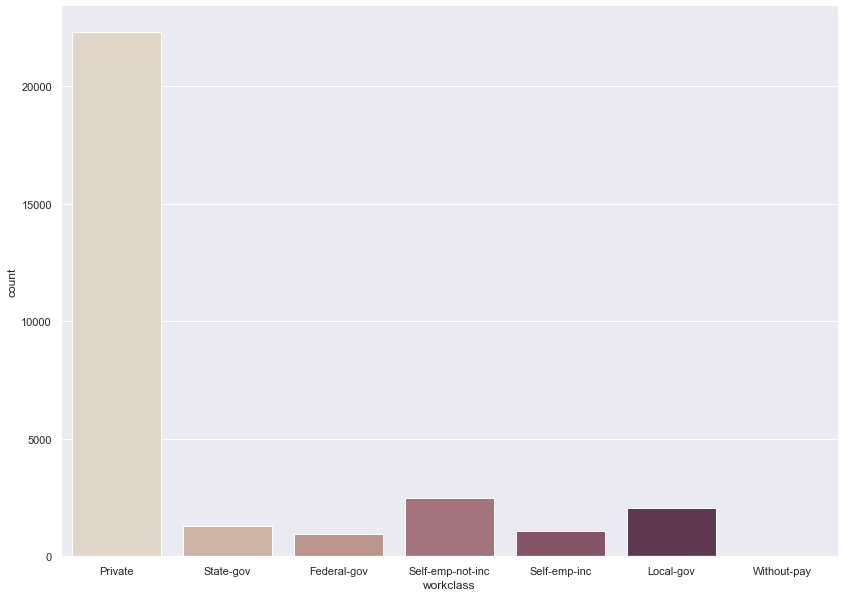

In [92]:
sns.catplot(x="workclass", kind="count", palette="ch:.25",height=8.27, aspect=11.7/8.27, data = data);
plt.xlabel("workclass")
plt.show()

In [93]:
# option2 - complete the data by - missing category imputation

In [94]:
#data_op2['workclass']
#data_op2['workclass'].fillna('Miss_workclass',inplace= True)
#data_op2['workclass']
#data_op2['occupation'].fillna('Miss_occupation',inplace= True)
#data_op2['occupation']
#data_op2['native.country'].fillna('Miss_native.country',inplace= True)
#data_op2['native.country']

# 3. Transformations  #

In [95]:
# explanatory variable - continuous : age - fnlwgt - education.num - capital.gain - capital.loss - hours.per.week

In [96]:
data.skew() 

age                0.530228
fnlwgt             1.459220
education.num     -0.305379
capital.gain      11.902682
capital.loss       4.526380
hours.per.week     0.330869
income             1.161408
dtype: float64

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


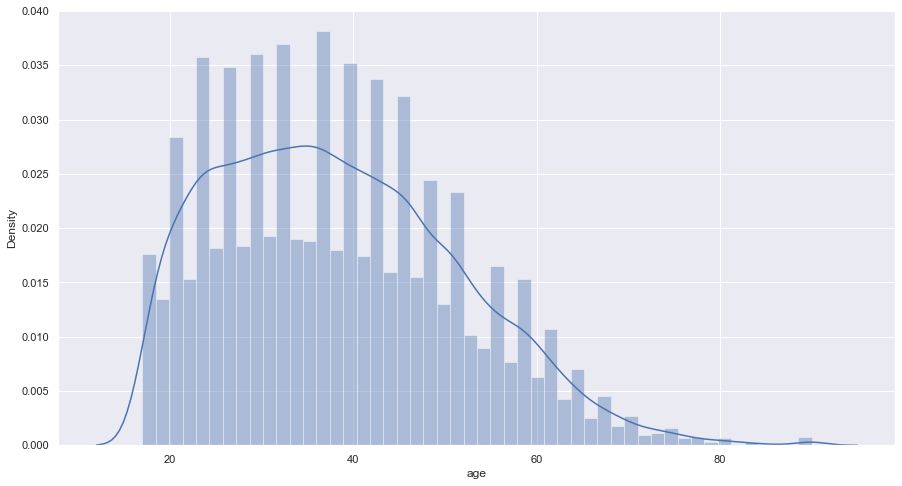

In [97]:
plt.figure(figsize=(15,8))
sns.distplot(data['age']);

<ipython-input-98-6767ab69b587>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_log'] = np.log(data['age'])
C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


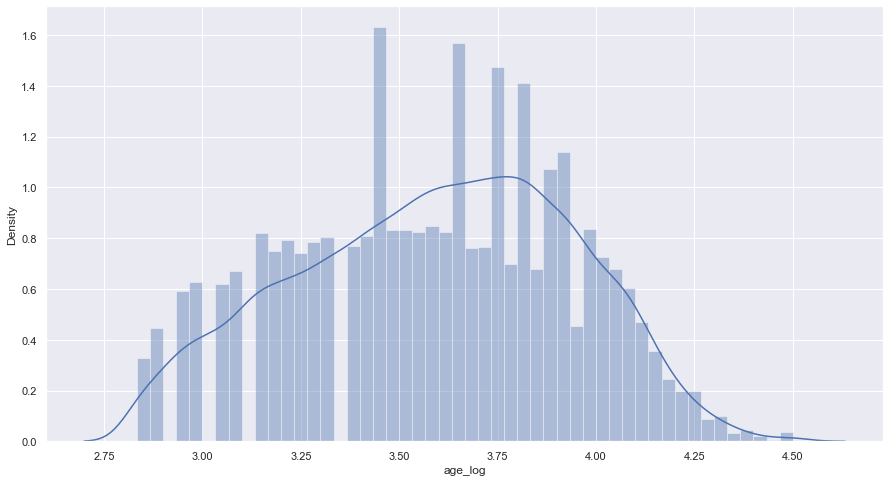

In [98]:
data['age_log'] = np.log(data['age'])
plt.figure(figsize=(15,8))
sns.distplot(data['age_log']);

# fnlwgt#

C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


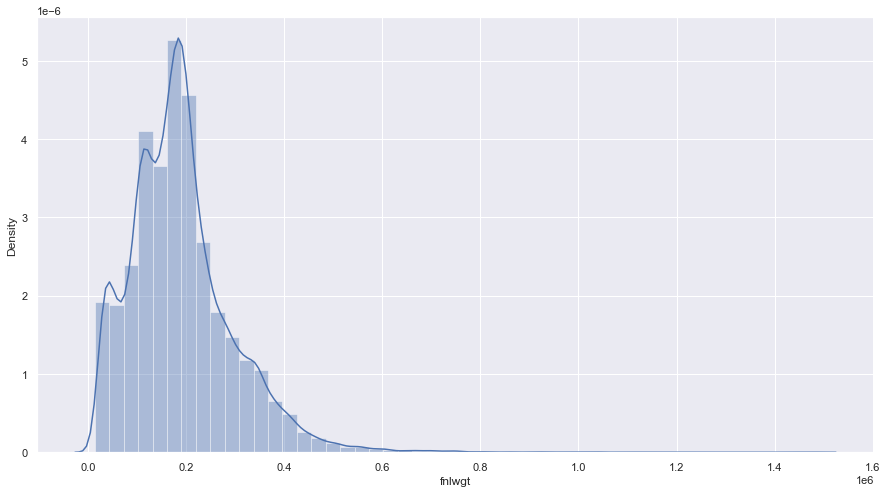

In [99]:
plt.figure(figsize=(15,8))
sns.distplot(data['fnlwgt']);

<ipython-input-100-64de6026d412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fnlwgt_log'] = np.log(data['fnlwgt'])
C:\Users\verthaim\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


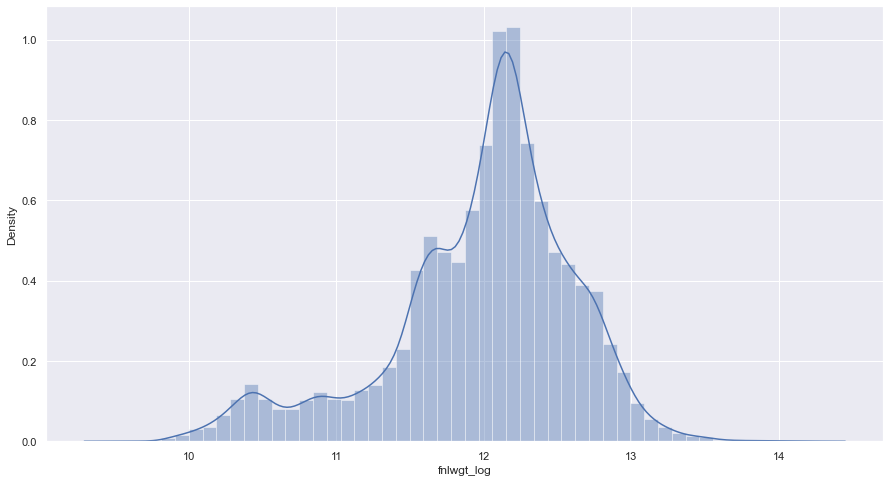

In [100]:
data['fnlwgt_log'] = np.log(data['fnlwgt'])
data=data.drop(['fnlwgt'],1)
plt.figure(figsize=(15,8))
sns.distplot(data['fnlwgt_log']);

In [101]:
data.skew() 

age                0.530228
education.num     -0.305379
capital.gain      11.902682
capital.loss       4.526380
hours.per.week     0.330869
income             1.161408
age_log           -0.157695
fnlwgt_log        -0.838387
dtype: float64

# correlation check 

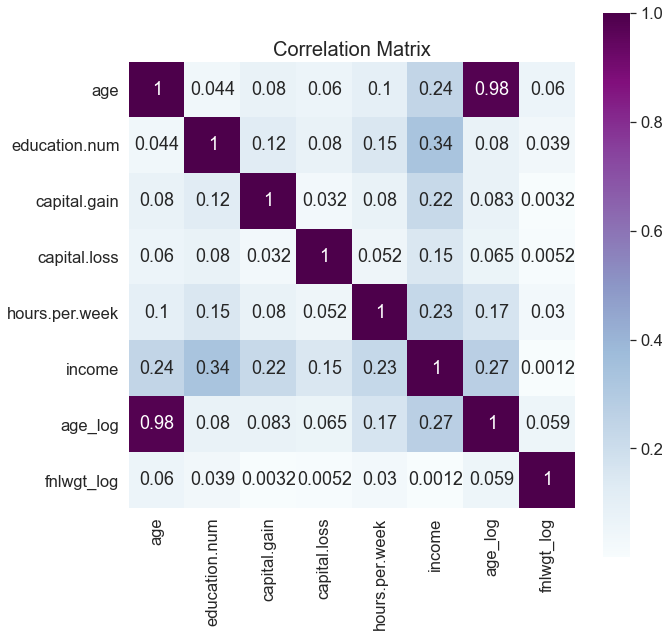

In [102]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(10,10))
corr = data.corr().abs()
sns.heatmap(corr,annot = True, mask=np.zeros_like(corr, dtype=np.bool),  cmap='BuPu',
            square=True, ax=ax )
plt.title('Correlation Matrix', fontsize=20)
plt.show()

# 4. discrimination 

# age code - 

In [103]:
# Equal Frequency

In [104]:
# Separating all possible values into ‘N’ number of bins, each having the same amount of observations. 
# Intervals may correspond to quantile values.

In [105]:
# Equal Frequency does improve the value spread
# It can handle outliers
# Can be combined with categorical encoding

In [106]:
labels = [int(i) for i in range(1,9)]
labels

[1, 2, 3, 4, 5, 6, 7, 8]

In [107]:
 data['age']

1        82
3        54
4        41
5        34
6        38
         ..
32556    22
32557    27
32558    40
32559    58
32560    22
Name: age, Length: 30162, dtype: int64

In [108]:
 pd.qcut(data['age'], q=8).value_counts()
 data['age_disccretised']=pd.qcut(data['age'], q=8)
data.head ()

(16.999, 23.0]    4117
(28.0, 33.0]      4064
(47.0, 55.0]      3907
(23.0, 28.0]      3893
(37.0, 42.0]      3852
(42.0, 47.0]      3547
(55.0, 90.0]      3438
(33.0, 37.0]      3344
Name: age, dtype: int64

In [109]:
data['age_disccretised']=pd.qcut(data['age'], q=8)
data.head ()

age workclass     education  education.num marital.status  \
1   82   Private       HS-grad              9        Widowed   
3   54   Private       7th-8th              4       Divorced   
4   41   Private  Some-college             10      Separated   
5   34   Private       HS-grad              9       Divorced   
6   38   Private          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country  income   age_log  fnlwgt_log  \
1          4356              18  United-States       0  4.406719   11.797126   
3          3900              40  United-States       0  3.988984   11.851959   
4          3900              40  United-States       0  3.713572   12.486213   
5          3770              45  United-States       0  3.526361   12.287026   
6          3770              40  United-States       0  3.637586   11.922389   

  age_disccretised  
1     (55.0, 90.0]  
3     (47.0, 55.0]  
4     (37.0, 42.0]  
5     (33.0, 37.0]  
6     (37.0, 42.0]

In [110]:
data=data.drop(['age'], axis=1)

In [111]:
# age_disccretised, intervals = pd.qcut(data['age'], q=8, labels=labels, retbins=True,duplicates='drop')
# pd.concat([age_disccretised, data['age']], axis=1).head(10)

In [112]:
# intervals

In [113]:
# data['dic_age'] = age_disccretised.astype(int)

# Equal Frequency week hours 

In [114]:
labels = [int(i) for i in range(1,8)]
labels

[1, 2, 3, 4, 5, 6, 7]

In [115]:
data['hours.per.week']

1        18
3        40
4        40
5        45
6        40
         ..
32556    40
32557    38
32558    40
32559    40
32560    20
Name: hours.per.week, Length: 30162, dtype: int64

In [116]:
# pd.qcut(data['hours.per.week'],9,labels=labels, retbins=True,duplicates='drop').value_counts()

In [117]:
# data['age_disccretised']=pd.qcut(data['hours.per.week'], q=8)
# data.head ()

In [118]:
#create histogram with equal-frequency bins 


In [119]:
week_hours_disccretised, intervals = pd.qcut(data['hours.per.week'], q=10, labels=labels, retbins=True,duplicates='drop')
pd.concat([week_hours_disccretised, data['hours.per.week']], axis=1).head(10)

hours.per.week  hours.per.week
1                1              18
3                3              40
4                3              40
5                5              45
6                3              40
7                1              20
8                3              40
10               2              35
11               5              45
12               1              20

In [120]:
intervals

array([ 1., 25., 36., 40., 42., 50., 55., 99.])

In [121]:
week_hours_disccretised.value_counts()

3    14889
5     5475
1     3261
2     2815
7     2595
6      880
4      247
Name: hours.per.week, dtype: int64

In [122]:
week_hours_disccretised.head()

1    1
3    3
4    3
5    5
6    3
Name: hours.per.week, dtype: category
Categories (7, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7]

In [123]:
data['dic_work_hours'] = week_hours_disccretised.astype(int)

<AxesSubplot:>

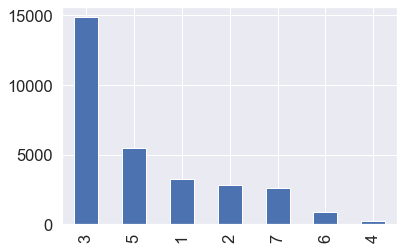

In [124]:
week_hours_disccretised.value_counts().plot.bar()

In [125]:
data=data.drop(['hours.per.week'], axis=1)

In [126]:
data.describe()

education.num  capital.gain  capital.loss        income       age_log  \
count   30162.000000  30162.000000  30162.000000  30162.000000  30162.000000   
mean       10.121312   1092.007858     88.372489      0.248922      3.589572   
std         2.549995   7406.346497    404.298370      0.432396      0.349281   
min         1.000000      0.000000      0.000000      0.000000      2.833213   
25%         9.000000      0.000000      0.000000      0.000000      3.332205   
50%        10.000000      0.000000      0.000000      0.000000      3.610918   
75%        13.000000      0.000000      0.000000      0.000000      3.850148   
max        16.000000  99999.000000   4356.000000      1.000000      4.499810   

         fnlwgt_log  dic_work_hours  
count  30162.000000    30162.000000  
mean      11.983762        3.493336  
std        0.630701        1.629699  
min        9.530175        1.000000  
25%       11.675276        3.000000  
50%       12.091924        3.000000  
75%       12.378464        5.000000  
max       14.210727        7.000000

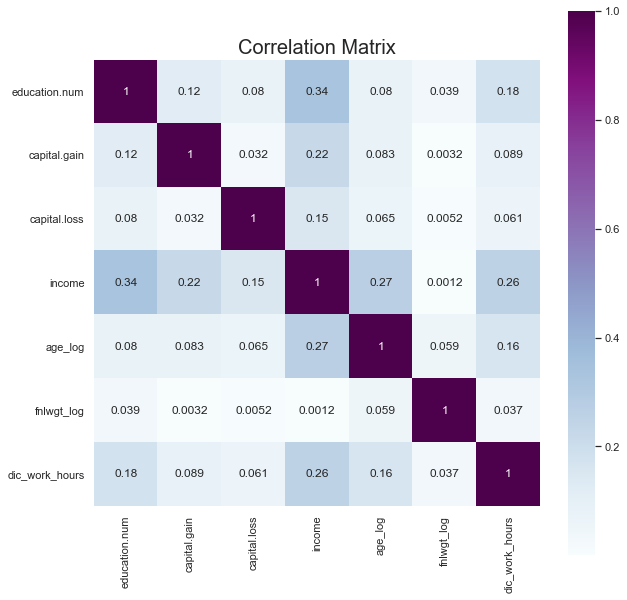

In [127]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(10,10))
corr = data.corr().abs()
sns.heatmap(corr,annot = True, mask=np.zeros_like(corr, dtype=np.bool),  cmap='BuPu',
            square=True, ax=ax )
plt.title('Correlation Matrix', fontsize=20)
plt.show()

# 5. unified and new categories  

In [128]:
# Create Married Column - Binary Yes(1) or No(0) === 4
data["marital.status"] = data["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
data["marital.status"] = data["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
#data["marital.status"] = data["marital.status"].map({"Married":1, "Single":0})
#data["marital.status"] = data["marital.status"].astype(int)

In [129]:
data["marital.status"]

1         Single
3         Single
4         Single
5         Single
6         Single
          ...   
32556     Single
32557    Married
32558    Married
32559     Single
32560     Single
Name: marital.status, Length: 30162, dtype: object

In [130]:
#Since majority of race is white, the rest of races can be combined together to form a new group === 4 

data['race'].unique()
data['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

In [131]:
data['race']

1        White
3        White
4        White
5        White
6        White
         ...  
32556    White
32557    White
32558    White
32559    White
32560    White
Name: race, Length: 30162, dtype: object

In [132]:
data['race'].unique()

array(['White', 'Black', ' Other'], dtype=object)

In [133]:
#Combining all other into one class === 4

countries = np.array(data['native.country'].unique())
countries = np.delete(countries, 0)

In [134]:
data['native.country'].replace(countries, 'Other', inplace = True)
#data['native.country'].replace(countries, 'Other', inplace = True)

In [135]:
data['native.country'].value_counts()

United-States    27504
Other             2658
Name: native.country, dtype: int64

<AxesSubplot:xlabel='native.country', ylabel='count'>

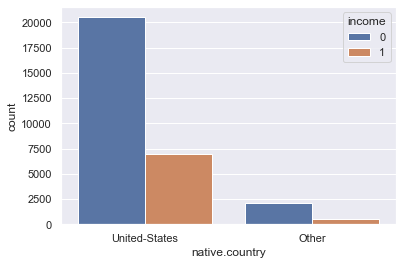

In [136]:
sns.countplot(x = 'native.country', hue = 'income', data = data)

In [137]:
data['education'].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [138]:
#Combining the lower grades of education together === 4 

#data.drop(['education.num'], axis = 1, inplace = True)
data['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],' School', inplace = True)
data['education'].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
 School         3741
Masters         1627
Assoc-voc       1307
Assoc-acdm      1008
Prof-school      542
Doctorate        375
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

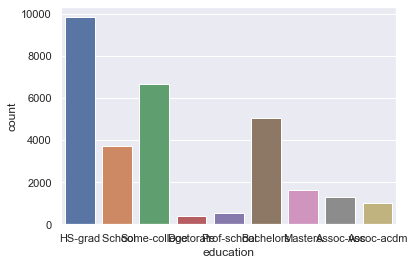

In [139]:
sns.countplot(x = 'education', data = data)

<AxesSubplot:xlabel='income', ylabel='count'>

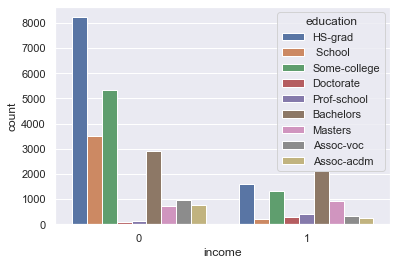

In [140]:
sns.countplot(x = 'income', hue = 'education', data = data)

In [141]:
data.columns

Index(['workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'native.country', 'income', 'age_log', 'fnlwgt_log',
       'age_disccretised', 'dic_work_hours'],
      dtype='object')

In [142]:
data['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [143]:
#data.drop(['education.num'], axis = 1, inplace = True)
data['occupation'].replace(['Armed-Forces', 'Priv-house-serv', 'Protective-serv'],'other', inplace = True)
data['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
other                 796
Name: occupation, dtype: int64

# 6.New featuers

In [144]:
# === 4 new val                                           
#Capital gain and capital loss can be combined and transformed into a feature capital difference. Plotting the new feature corresponding to income

data['Capital Diff'] = data['capital.gain'] - data['capital.loss']

#dataset.drop(['capital.loss'], axis = 1, inplace = True)

In [145]:
data['Capital Diff'].value_counts()

 0        26197
 15024      337
 7688       270
 7298       240
-1902       194
          ...  
 4931         1
 2387         1
 5060         1
 1639         1
 401          1
Name: Capital Diff, Length: 207, dtype: int64

In [146]:
data['Capital Diff'].min()

-4356

<AxesSubplot:xlabel='Capital Diff', ylabel='count'>

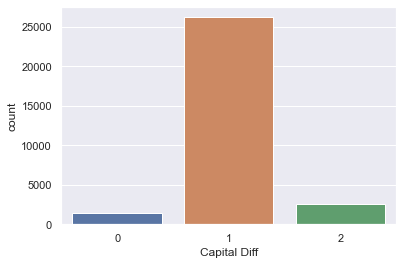

In [147]:
data['Capital Diff'] = pd.cut(data['Capital Diff'], bins = [-5000,-1, 0, 100000], labels = [0, 1,2])
sns.countplot(x = 'Capital Diff', data = data)

<AxesSubplot:xlabel='income', ylabel='count'>

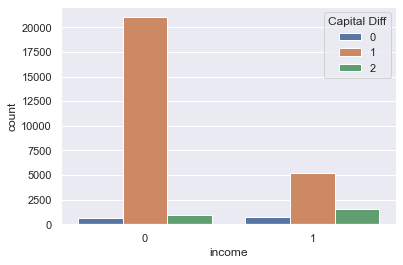

In [148]:
sns.countplot(x = 'income', hue = 'Capital Diff', data = data)

In [149]:
data['Capital Diff']

1        0
3        0
4        0
5        0
6        0
        ..
32556    1
32557    1
32558    1
32559    1
32560    1
Name: Capital Diff, Length: 30162, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [150]:
data=data.drop(['capital.gain','capital.loss'],1)

In [151]:
data

workclass     education  education.num marital.status  \
1       Private       HS-grad              9         Single   
3       Private        School              4         Single   
4       Private  Some-college             10         Single   
5       Private       HS-grad              9         Single   
6       Private        School              6         Single   
...         ...           ...            ...            ...   
32556   Private  Some-college             10         Single   
32557   Private    Assoc-acdm             12        Married   
32558   Private       HS-grad              9        Married   
32559   Private       HS-grad              9         Single   
32560   Private       HS-grad              9         Single   

              occupation   relationship   race     sex native.country  income  \
1        Exec-managerial  Not-in-family  White  Female  United-States       0   
3      Machine-op-inspct      Unmarried  White  Female  United-States       0   
4         Prof-specialty      Own-child  White  Female  United-States       0   
5          Other-service      Unmarried  White  Female  United-States       0   
6           Adm-clerical      Unmarried  White    Male  United-States       0   
...                  ...            ...    ...     ...            ...     ...   
32556              other  Not-in-family  White    Male  United-States       0   
32557       Tech-support           Wife  White  Female  United-States       0   
32558  Machine-op-inspct        Husband  White    Male  United-States       1   
32559       Adm-clerical      Unmarried  White  Female  United-States       0   
32560       Adm-clerical      Own-child  White    Male  United-States       0   

        age_log  fnlwgt_log age_disccretised  dic_work_hours Capital Diff  
1      4.406719   11.797126     (55.0, 90.0]               1            0  
3      3.988984   11.851959     (47.0, 55.0]               3            0  
4      3.713572   12.486213     (37.0, 42.0]               3            0  
5      3.526361   12.287026     (33.0, 37.0]               5            0  
6      3.637586   11.922389     (37.0, 42.0]               3            0  
...         ...         ...              ...             ...          ...  
32556  3.091042   12.644818   (16.999, 23.0]               3            1  
32557  3.295837   12.458006     (23.0, 28.0]               3            1  
32558  3.688879   11.947134     (37.0, 42.0]               3            1  
32559  4.060443   11.931044     (55.0, 90.0]               3            1  
32560  3.091042   12.213495   (16.999, 23.0]               1            1  

[30162 rows x 15 columns]

# 7. Encoding

In [152]:
#data_copy = data.copy()

In [153]:
# Changing the Categorical Values to Numerical values using the sklearns Label Encoder
#from sklearn.preprocessing import LabelEncoder

#categorical_features = list(data.select_dtypes(include=['object']).columns)

#categorical_features

In [154]:
#label_encoder_feat = {}
#for i, feature in enumerate(categorical_features):
#    label_encoder_feat[feature] = LabelEncoder()
#    data_copy[feature] = label_encoder_feat[feature].fit_transform(data_copy[feature])

#data_copy.sample(10)

In [155]:
#column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
#       'marital.status', 'occupation', 'relationship', 'race', 'sex',
#       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
#    'age_log', 'fnlwgt_log', 'dic_work_hours', 'Capital Diff','income']

#data_copy = data_copy.reindex(columns=column_names)

In [156]:
#data_copy.columns

In [157]:
#data_copy = data_copy.dropna(axis=0, how='any', inplace=False)

In [158]:
#temp = data_copy.drop(labels=["income"], axis = 1, inplace = False)


In [159]:
#from sklearn.model_selection import train_test_split
#Xt_train,Xt_test,yt_train,yt_test=train_test_split(temp,data_copy['income'],test_size=0.2,random_state=0)

In [160]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.inspection import permutation_importance
##import shap
#from matplotlib import pyplot as plt
#rf = RandomForestRegressor(n_estimators=100)
#rf.fit(Xt_train, yt_train)
#perm_importance = permutation_importance(rf, Xt_train, yt_train)
#sorted_idx = perm_importance.importances_mean.argsort()
#plt.barh(temp.columns, perm_importance.importances_mean[sorted_idx])
#plt.xlabel("Permutation Importance")

In [161]:
#data_copy.skew() 

# Lable Encoder for ordinal feature

In [162]:
from sklearn.preprocessing import LabelEncoder

In [163]:
data_dummy_and_lable_encoder=data.copy()

In [164]:
data_dummy_and_lable_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   workclass         30162 non-null  object  
 1   education         30162 non-null  object  
 2   education.num     30162 non-null  int64   
 3   marital.status    30162 non-null  object  
 4   occupation        30162 non-null  object  
 5   relationship      30162 non-null  object  
 6   race              30162 non-null  object  
 7   sex               30162 non-null  object  
 8   native.country    30162 non-null  object  
 9   income            30162 non-null  int64   
 10  age_log           30162 non-null  float64 
 11  fnlwgt_log        30162 non-null  float64 
 12  age_disccretised  30162 non-null  category
 13  dic_work_hours    30162 non-null  int32   
 14  Capital Diff      30162 non-null  category
dtypes: category(2), float64(2), int32(1), int64(2), object(8)
memory usage

In [165]:
features_to_lable_encode=['Capital Diff','age_disccretised']


In [166]:
label_encoder_feat = {}
for i, feature in enumerate(features_to_lable_encode):
    label_encoder_feat[feature] = LabelEncoder()
    data_dummy_and_lable_encoder[feature] = label_encoder_feat[feature].fit_transform(data_dummy_and_lable_encoder[feature])
    



In [167]:
data_dummy_and_lable_encoder

workclass     education  education.num marital.status  \
1       Private       HS-grad              9         Single   
3       Private        School              4         Single   
4       Private  Some-college             10         Single   
5       Private       HS-grad              9         Single   
6       Private        School              6         Single   
...         ...           ...            ...            ...   
32556   Private  Some-college             10         Single   
32557   Private    Assoc-acdm             12        Married   
32558   Private       HS-grad              9        Married   
32559   Private       HS-grad              9         Single   
32560   Private       HS-grad              9         Single   

              occupation   relationship   race     sex native.country  income  \
1        Exec-managerial  Not-in-family  White  Female  United-States       0   
3      Machine-op-inspct      Unmarried  White  Female  United-States       0   
4         Prof-specialty      Own-child  White  Female  United-States       0   
5          Other-service      Unmarried  White  Female  United-States       0   
6           Adm-clerical      Unmarried  White    Male  United-States       0   
...                  ...            ...    ...     ...            ...     ...   
32556              other  Not-in-family  White    Male  United-States       0   
32557       Tech-support           Wife  White  Female  United-States       0   
32558  Machine-op-inspct        Husband  White    Male  United-States       1   
32559       Adm-clerical      Unmarried  White  Female  United-States       0   
32560       Adm-clerical      Own-child  White    Male  United-States       0   

        age_log  fnlwgt_log  age_disccretised  dic_work_hours  Capital Diff  
1      4.406719   11.797126                 7               1             0  
3      3.988984   11.851959                 6               3             0  
4      3.713572   12.486213                 4               3             0  
5      3.526361   12.287026                 3               5             0  
6      3.637586   11.922389                 4               3             0  
...         ...         ...               ...             ...           ...  
32556  3.091042   12.644818                 0               3             1  
32557  3.295837   12.458006                 1               3             1  
32558  3.688879   11.947134                 4               3             1  
32559  4.060443   11.931044                 7               3             1  
32560  3.091042   12.213495                 0               1             1  

[30162 rows x 15 columns]

# Dummy encoder

In [168]:
y = data_dummy_and_lable_encoder.income
features = [x for x in data_dummy_and_lable_encoder.columns if x!='income' and x!=features_to_lable_encode ]
X = pd.get_dummies(data_dummy_and_lable_encoder[features])
# X_simple_encoder=X
X

education.num   age_log  fnlwgt_log  age_disccretised  dic_work_hours  \
1                  9  4.406719   11.797126                 7               1   
3                  4  3.988984   11.851959                 6               3   
4                 10  3.713572   12.486213                 4               3   
5                  9  3.526361   12.287026                 3               5   
6                  6  3.637586   11.922389                 4               3   
...              ...       ...         ...               ...             ...   
32556             10  3.091042   12.644818                 0               3   
32557             12  3.295837   12.458006                 1               3   
32558              9  3.688879   11.947134                 4               3   
32559              9  4.060443   11.931044                 7               3   
32560              9  3.091042   12.213495                 0               1   

       Capital Diff  workclass_Federal-gov  workclass_Local-gov  \
1                 0                      0                    0   
3                 0                      0                    0   
4                 0                      0                    0   
5                 0                      0                    0   
6                 0                      0                    0   
...             ...                    ...                  ...   
32556             1                      0                    0   
32557             1                      0                    0   
32558             1                      0                    0   
32559             1                      0                    0   
32560             1                      0                    0   

       workclass_Private  workclass_Self-emp-inc  ...  relationship_Own-child  \
1                      1                       0  ...                       0   
3                      1                       0  ...                       0   
4                      1                       0  ...                       1   
5                      1                       0  ...                       0   
6                      1                       0  ...                       0   
...                  ...                     ...  ...                     ...   
32556                  1                       0  ...                       0   
32557                  1                       0  ...                       0   
32558                  1                       0  ...                       0   
32559                  1                       0  ...                       0   
32560                  1                       0  ...                       1   

       relationship_Unmarried  relationship_Wife  race_ Other  race_Black  \
1                           0                  0            0           0   
3                           1                  0            0           0   
4                           0                  0            0           0   
5                           1                  0            0           0   
6                           1                  0            0           0   
...                       ...                ...          ...         ...   
32556                       0                  0            0           0   
32557                       0                  1            0           0   
32558                       0                  0            0           0   
32559                       1                  0            0           0   
32560                       0                  0            0           0   

       race_White  sex_Female  sex_Male  native.country_Other  \
1               1           1         0                     0   
3               1           1         0                     0   
4               1           1         0                     0   
5               1           1         0                     0   
6               1 

In [169]:
y

1        0
3        0
4        0
5        0
6        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30162, dtype: int64

In [170]:
frames = [X, y]
# frames = [X_simple_encoder, y]

In [171]:
full_data_simple_encoder = pd.concat(frames,axis=1)
full_data_simple_encoder

education.num   age_log  fnlwgt_log  age_disccretised  dic_work_hours  \
1                  9  4.406719   11.797126                 7               1   
3                  4  3.988984   11.851959                 6               3   
4                 10  3.713572   12.486213                 4               3   
5                  9  3.526361   12.287026                 3               5   
6                  6  3.637586   11.922389                 4               3   
...              ...       ...         ...               ...             ...   
32556             10  3.091042   12.644818                 0               3   
32557             12  3.295837   12.458006                 1               3   
32558              9  3.688879   11.947134                 4               3   
32559              9  4.060443   11.931044                 7               3   
32560              9  3.091042   12.213495                 0               1   

       Capital Diff  workclass_Federal-gov  workclass_Local-gov  \
1                 0                      0                    0   
3                 0                      0                    0   
4                 0                      0                    0   
5                 0                      0                    0   
6                 0                      0                    0   
...             ...                    ...                  ...   
32556             1                      0                    0   
32557             1                      0                    0   
32558             1                      0                    0   
32559             1                      0                    0   
32560             1                      0                    0   

       workclass_Private  workclass_Self-emp-inc  ...  relationship_Unmarried  \
1                      1                       0  ...                       0   
3                      1                       0  ...                       1   
4                      1                       0  ...                       0   
5                      1                       0  ...                       1   
6                      1                       0  ...                       1   
...                  ...                     ...  ...                     ...   
32556                  1                       0  ...                       0   
32557                  1                       0  ...                       0   
32558                  1                       0  ...                       0   
32559                  1                       0  ...                       1   
32560                  1                       0  ...                       0   

       relationship_Wife  race_ Other  race_Black  race_White  sex_Female  \
1                      0            0           0           1           1   
3                      0            0           0           1           1   
4                      0            0           0           1           1   
5                      0            0           0           1           1   
6                      0            0           0           1           0   
...                  ...          ...         ...         ...         ...   
32556                  0            0           0           1           0   
32557                  1            0           0           1           1   
32558                  0            0           0           1           0   
32559                  0            0           0           1           1   
32560                  0            0           0           1           0   

       sex_Male  native.country_Other  native.country_United-States  income  
1             0                     0                             1       0  
3             0                     0                             1       0  
4             0                     0                             1       0  
5             0                

## Encoding by features

In [172]:
# numerical_columns = data.describe().columns
# numerical_columns

In [173]:
# categorical_columns = [x for x in data.columns if x not in numerical_columns and x!='income']
# categorical_columns

In [174]:
# def encode_column_by_frequency(x_train, x_val, col, log=True):
#     occupation_by_target = x_train.groupby(col)['y_train'].value_counts().unstack().fillna(0)
#     if log:
#         occupation_probability = np.log((occupation_by_target['>50K']+1e-5)/(occupation_by_target.sum(axis=1)+1e-5))
#     else:
#         occupation_probability = (occupation_by_target['>50K']+1e-5)/(occupation_by_target.sum(axis=1)+1e-5)
#     for val in x_val[col].unique():    
#         if val in ooccupation_probability.index.values: 
#             continue
#         occupation_probability[x_val] = occupation_probability.median()
#     x_train[col] = x_train[col].map(occupation_probability)
#     x_val[col] = x_val[col].map(occupation_probability)
#     return x_train, x_val

# def encode_numeric_column_by_frequency(x_train, x_val, col, log=True, plot_flag=False, window_size=3):
#     occupation_by_target = train.groupby(col)['y_train'].value_counts().unstack().fillna(0)
#     if log:
#         occupation_probability = np.log((occupation_by_target['>50K']+1e-5)/(occupation_by_target.sum(axis=1)+1e-5))
#     else:
#         occupation_probability = (occupation_by_target['>50K']+1e-5)/(occupation_by_target.sum(axis=1)+1e-5)
#     values = np.unique(x_train[col].unique().tolist()+x_val[col].unique().tolist())
#     resolution = min(1,np.min(np.diff(values)))
#     start = np.min(occupation_probability.index.unique().tolist())
#     end = np.max(occupation_probability.index.unique().tolist())
#     occupation_probability = pd.merge(pd.DataFrame(occupation_probability),
#                                    pd.DataFrame(index=np.arange(start, end+resolution, resolution)),
#                                    left_index=True, right_index=True, how='outer').interpolate(method='linear')
#     if plot_flag:
#         plt.figure()
#         occupation_probability[0].plot(marker='o')
#     occupation_probability=((occupation_probability[0].cumsum() - occupation_probability[0].shift(window_size).cumsum())/window_size).shift(-1).fillna(0)
#     if plot_flag:
#         occupation_probability.plot()
#         plt.title(col)
#     train[col] = train[col].map(occupation_probability)
#     test[col] = test[col].map(occupation_probability)
#     return train, test

In [175]:
# def get_data_with_encoded_fetures(plot_flag=False):
#     categorical_columns = [x for x in data.columns if x not in numerical_columns and x!='income']
#     columns_to_encode_with_frequencies=categorical_columns
#     for col in categorical_columns:
#         data.loc[data[col]==' ?',col] = data[col].value_counts().index.values[0]
#     features = [x for x in data if x != 'income']
#     X = data[features]
#     y = data.income==">50K"
#     skf = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
#     train_index, test_index = list(skf.split(X, y))[0]
#     train, test = data.iloc[train_index], data.iloc[test_index]
#     y_train, y_test = y[train_index], y[test_index]
#     for col in categorical_columns:
#         train, test = encode_column_by_frequency(train, test, col, log=False)
#     for col in numerical_columns: 
#         if col=='fnlwgt': continue
#         train, test = encode_numeric_column_by_frequency(train, test, col,log=False, plot_flag=plot_flag)
#     train=train.drop('income',axis=1)
#     test=test.drop('income',axis=1)
#     return train, test, y_train, y_test

In [176]:
# data_deature_encoder=data.copy()
# y = data_deature_encoder.income
# features = [x for x in data_deature_encoder.columns if x!='income']


# Removing features

In [177]:
X=full_data_simple_encoder


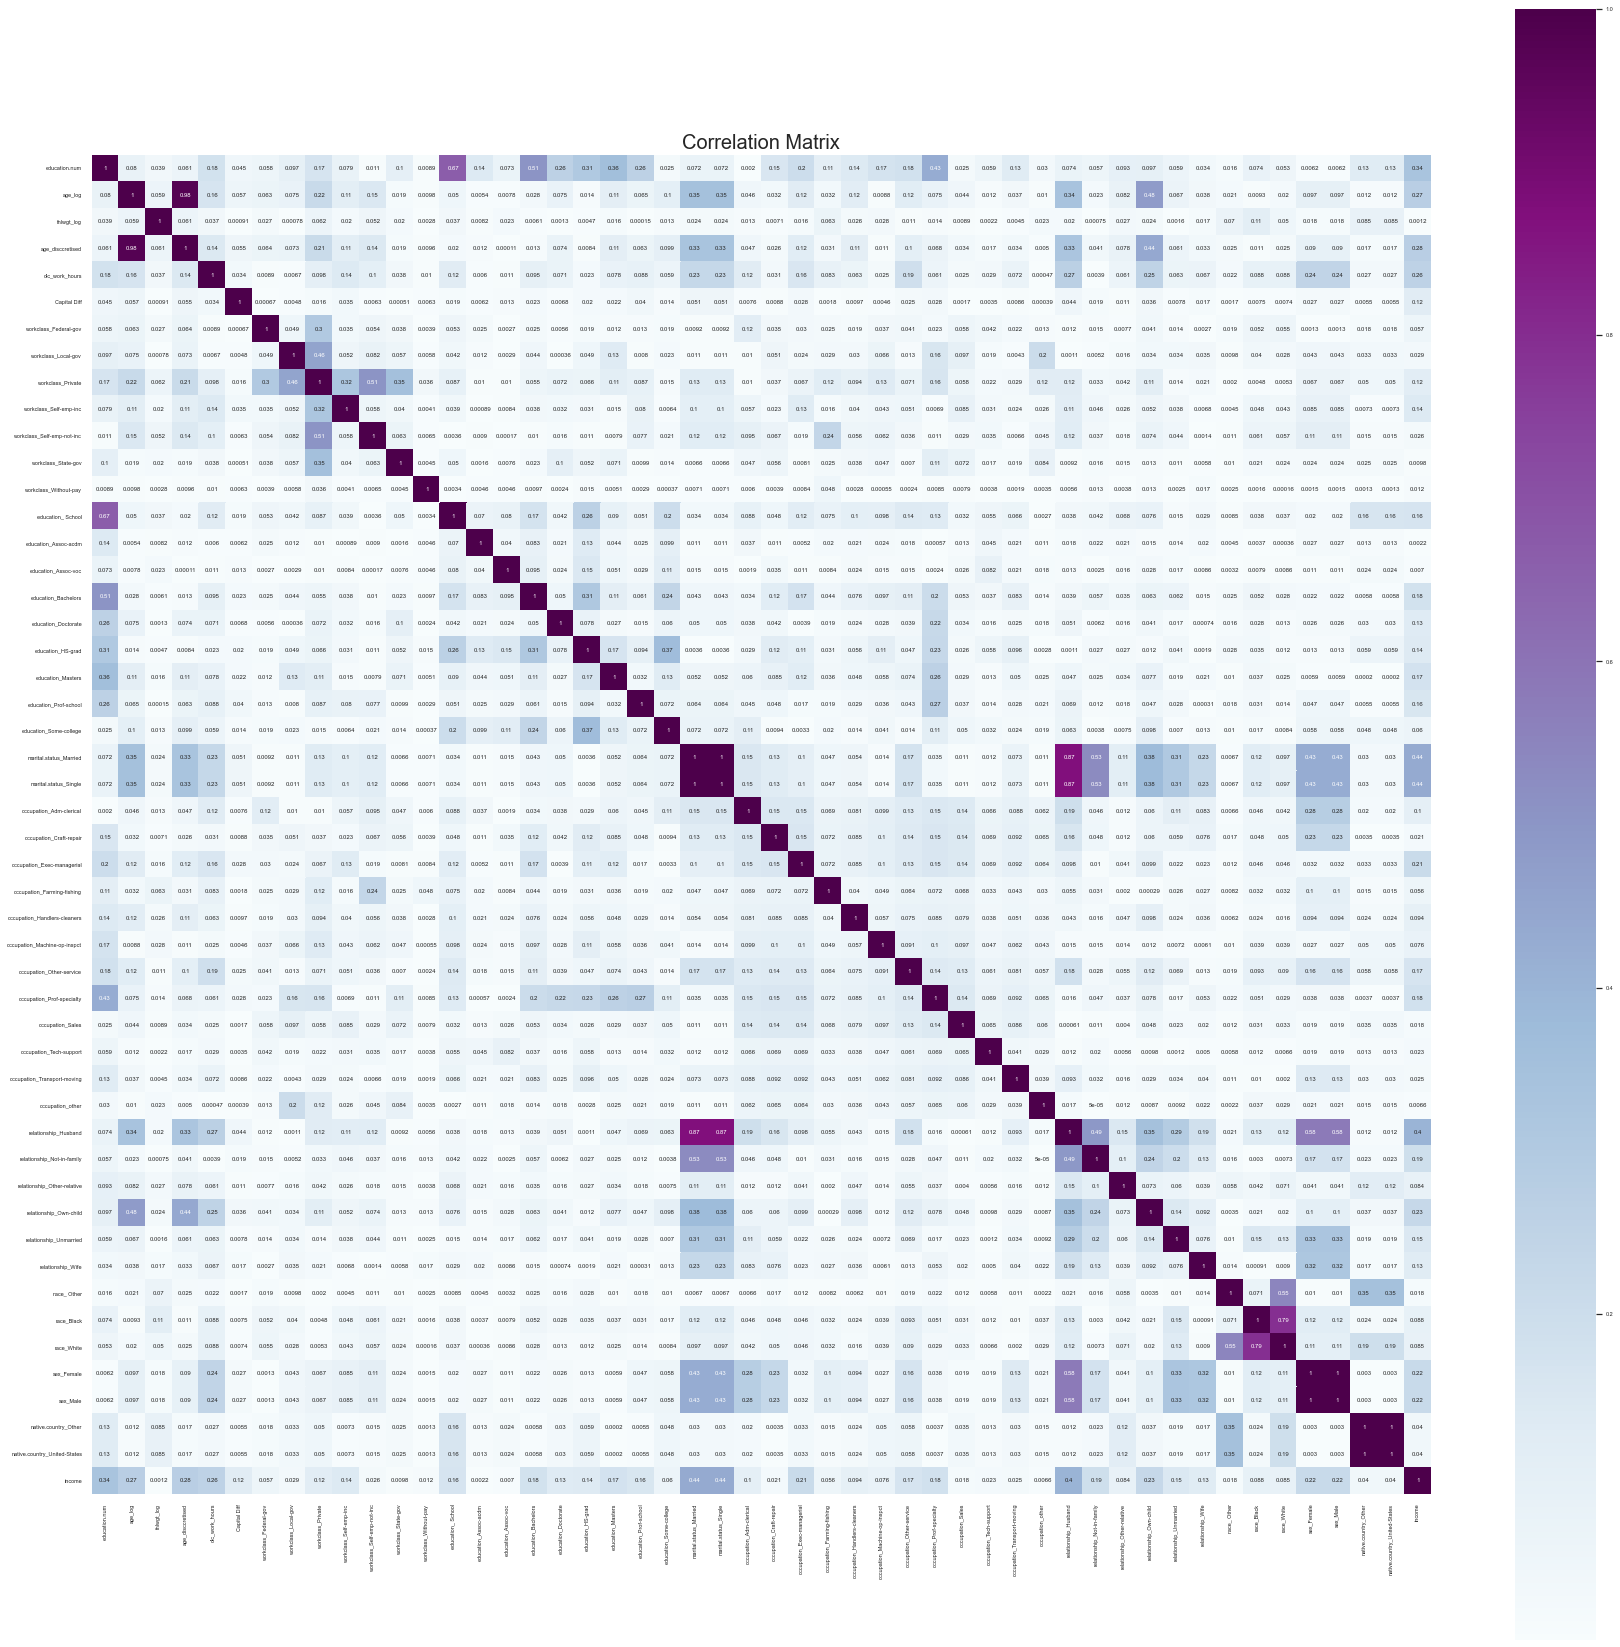

In [178]:

sns.set(font_scale=0.5)
f, ax = plt.subplots(figsize=(30,30))
corr = X.corr().abs()
sns.heatmap(corr,annot = True, mask=np.zeros_like(corr, dtype=np.bool),  cmap='BuPu',
            square=True, ax=ax )
plt.title('Correlation Matrix', fontsize=20)
plt.show()

# Find features which are highly correlated to each other


In [179]:
if 'income' in X:
    X = X.drop('income', axis=1)
corr = X.corr()
most_correlated_variables = get_most_correlated_variables(corr, num_pairs=40)

In [180]:
most_correlated_variables


var_1                   var_2     value
0                     sex_Female  relationship_Unmarried  0.326334
1                       sex_Male  relationship_Unmarried -0.326334
2           relationship_Husband        age_disccretised  0.327249
3         marital.status_Married        age_disccretised  0.334537
4          marital.status_Single        age_disccretised -0.334537
5           relationship_Husband                 age_log  0.338592
6         marital.status_Married                 age_log  0.348412
7          marital.status_Single                 age_log -0.348412
8           native.country_Other             race_ Other  0.349125
9   native.country_United-States             race_ Other -0.349125
10        relationship_Own-child    relationship_Husband -0.349835
11           workclass_State-gov       workclass_Private -0.353979
12             education_Masters           education.num  0.363210
13        education_Some-college       education_HS-grad -0.371066
14        relationship_Own-child  marital.status_Married -0.376230
15        relationship_Own-child   marital.status_Single  0.376230
16                      sex_Male  marital.status_Married  0.426348
17                      sex_Male   marital.status_Single -0.426348
18                    sex_Female   marital.status_Single  0.426348
19                    sex_Female  marital.status_Married -0.426348
20     occupation_Prof-specialty           education.num  0.427039
21        relationship_Own-child        age_disccretised -0.439296
22             workclass_Private     workclass_Local-gov -0.456267
23        relationship_Own-child                 age_log -0.483564
24    relationship_Not-in-family    relationship_Husband -0.492427
25    workclass_Self-emp-not-inc       workclass_Private -0.505588
26           education_Bachelors           education.num  0.505892
27    relationship_Not-in-family   marital.status_Single  0.533336
28    relationship_Not-in-family  marital.status_Married -0.533336
29                    race_White             race_ Other -0.548790
30                    sex_Female    relationship_Husband -0.581221
31                      sex_Male    relationship_Husband  0.581221
32             education_ School           education.num -0.665757
33                    race_White              race_Black -0.794808
34          relationship_Husband  marital.status_Married  0.874673
35          relationship_Husband   marital.status_Single -0.874673
36              age_disccretised                 age_log  0.978721
37         marital.status_Single  marital.status_Married -1.000000
38                      sex_Male              sex_Female -1.000000
39  native.country_United-States    native.country_Other -1.000000

In [181]:
to_drop=[]
most_correlated_variables.tail(10).var_2.values
to_drop=most_correlated_variables.tail(10).var_2.values
to_drop



In [182]:
to_drop

array(['relationship_Husband', 'relationship_Husband', 'education.num',
       'race_Black', 'marital.status_Married', 'marital.status_Single',
       'age_log', 'marital.status_Married', 'sex_Female',
       'native.country_Other'], dtype=object)

# Find features which are highly correlated with the target¶


In [183]:
X

education.num   age_log  fnlwgt_log  age_disccretised  dic_work_hours  \
1                  9  4.406719   11.797126                 7               1   
3                  4  3.988984   11.851959                 6               3   
4                 10  3.713572   12.486213                 4               3   
5                  9  3.526361   12.287026                 3               5   
6                  6  3.637586   11.922389                 4               3   
...              ...       ...         ...               ...             ...   
32556             10  3.091042   12.644818                 0               3   
32557             12  3.295837   12.458006                 1               3   
32558              9  3.688879   11.947134                 4               3   
32559              9  4.060443   11.931044                 7               3   
32560              9  3.091042   12.213495                 0               1   

       Capital Diff  workclass_Federal-gov  workclass_Local-gov  \
1                 0                      0                    0   
3                 0                      0                    0   
4                 0                      0                    0   
5                 0                      0                    0   
6                 0                      0                    0   
...             ...                    ...                  ...   
32556             1                      0                    0   
32557             1                      0                    0   
32558             1                      0                    0   
32559             1                      0                    0   
32560             1                      0                    0   

       workclass_Private  workclass_Self-emp-inc  ...  relationship_Own-child  \
1                      1                       0  ...                       0   
3                      1                       0  ...                       0   
4                      1                       0  ...                       1   
5                      1                       0  ...                       0   
6                      1                       0  ...                       0   
...                  ...                     ...  ...                     ...   
32556                  1                       0  ...                       0   
32557                  1                       0  ...                       0   
32558                  1                       0  ...                       0   
32559                  1                       0  ...                       0   
32560                  1                       0  ...                       1   

       relationship_Unmarried  relationship_Wife  race_ Other  race_Black  \
1                           0                  0            0           0   
3                           1                  0            0           0   
4                           0                  0            0           0   
5                           1                  0            0           0   
6                           1                  0            0           0   
...                       ...                ...          ...         ...   
32556                       0                  0            0           0   
32557                       0                  1            0           0   
32558                       0                  0            0           0   
32559                       1                  0            0           0   
32560                       0                  0            0           0   

       race_White  sex_Female  sex_Male  native.country_Other  \
1               1           1         0                     0   
3               1           1         0                     0   
4               1           1         0                     0   
5               1           1         0                     0   
6               1 

In [184]:
if 'income' not in X:
    X['income'] = y
corr = X.corr()
corr_with_target = corr[['income']].drop('income', axis=0)
corr_with_target['abs_value'] = corr_with_target.abs()
corr_with_target.sort_values(by='abs_value').tail(10).drop('abs_value',axis=1)

income
sex_Female             -0.216699
sex_Male                0.216699
relationship_Own-child -0.226186
dic_work_hours          0.257368
age_log                 0.274094
age_disccretised        0.275087
education.num           0.335286
relationship_Husband    0.401236
marital.status_Single  -0.436142
marital.status_Married  0.436142

In [185]:
best_features_by_correlation = corr_with_target[corr_with_target.abs_value>0.05].index.values


In [186]:
to_drop2=corr_with_target[corr_with_target.abs_value<0.05].index.values

In [187]:
len(to_drop2)

15

In [188]:
to_drop2


array(['fnlwgt_log', 'workclass_Local-gov', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'education_Assoc-acdm', 'education_Assoc-voc',
       'occupation_Craft-repair', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'occupation_other', 'race_ Other', 'native.country_Other',
       'native.country_United-States'], dtype=object)

In [189]:
X=X.drop(labels=to_drop2,axis=1)

In [190]:
X

education.num   age_log  age_disccretised  dic_work_hours  \
1                  9  4.406719                 7               1   
3                  4  3.988984                 6               3   
4                 10  3.713572                 4               3   
5                  9  3.526361                 3               5   
6                  6  3.637586                 4               3   
...              ...       ...               ...             ...   
32556             10  3.091042                 0               3   
32557             12  3.295837                 1               3   
32558              9  3.688879                 4               3   
32559              9  4.060443                 7               3   
32560              9  3.091042                 0               1   

       Capital Diff  workclass_Federal-gov  workclass_Private  \
1                 0                      0                  1   
3                 0                      0                  1   
4                 0                      0                  1   
5                 0                      0                  1   
6                 0                      0                  1   
...             ...                    ...                ...   
32556             1                      0                  1   
32557             1                      0                  1   
32558             1                      0                  1   
32559             1                      0                  1   
32560             1                      0                  1   

       workclass_Self-emp-inc  education_ School  education_Bachelors  ...  \
1                           0                  0                    0  ...   
3                           0                  1                    0  ...   
4                           0                  0                    0  ...   
5                           0                  0                    0  ...   
6                           0                  1                    0  ...   
...                       ...                ...                  ...  ...   
32556                       0                  0                    0  ...   
32557                       0                  0                    0  ...   
32558                       0                  0                    0  ...   
32559                       0                  0                    0  ...   
32560                       0                  0                    0  ...   

       relationship_Not-in-family  relationship_Other-relative  \
1                               1                            0   
3                               0                            0   
4                               0                            0   
5                               0                            0   
6                               0                            0   
...                           ...                          ...   
32556                           1                            0   
32557                           0                            0   
32558                           0                            0   
32559                           0                            0   
32560                           0                            0   

       relationship_Own-child  relationship_Unmarried  relationship_Wife  \
1                           0                       0                  0   
3                           0                       1                  0   
4                           1                       0                  0   
5                           0                       1                  0   
6                           0                       1                  0   
...                       ...                     ...                ...   
32556                       0                       0                  0   
32557                       0                       0                  

In [191]:
 X=X.drop(labels=['marital.status_Single','sex_Male','relationship_Husband'],axis=1)
#  X=X.drop(labels=['marital.status_Single','sex_Male','hours.per.week','relationship_Husband'],axis=1)




In [192]:
X

education.num   age_log  age_disccretised  dic_work_hours  \
1                  9  4.406719                 7               1   
3                  4  3.988984                 6               3   
4                 10  3.713572                 4               3   
5                  9  3.526361                 3               5   
6                  6  3.637586                 4               3   
...              ...       ...               ...             ...   
32556             10  3.091042                 0               3   
32557             12  3.295837                 1               3   
32558              9  3.688879                 4               3   
32559              9  4.060443                 7               3   
32560              9  3.091042                 0               1   

       Capital Diff  workclass_Federal-gov  workclass_Private  \
1                 0                      0                  1   
3                 0                      0                  1   
4                 0                      0                  1   
5                 0                      0                  1   
6                 0                      0                  1   
...             ...                    ...                ...   
32556             1                      0                  1   
32557             1                      0                  1   
32558             1                      0                  1   
32559             1                      0                  1   
32560             1                      0                  1   

       workclass_Self-emp-inc  education_ School  education_Bachelors  ...  \
1                           0                  0                    0  ...   
3                           0                  1                    0  ...   
4                           0                  0                    0  ...   
5                           0                  0                    0  ...   
6                           0                  1                    0  ...   
...                       ...                ...                  ...  ...   
32556                       0                  0                    0  ...   
32557                       0                  0                    0  ...   
32558                       0                  0                    0  ...   
32559                       0                  0                    0  ...   
32560                       0                  0                    0  ...   

       occupation_Prof-specialty  relationship_Not-in-family  \
1                              0                           1   
3                              0                           0   
4                              1                           0   
5                              0                           0   
6                              0                           0   
...                          ...                         ...   
32556                          0                           1   
32557                          0                           0   
32558                          0                           0   
32559                          0                           0   
32560                          0                           0   

       relationship_Other-relative  relationship_Own-child  \
1                                0                       0   
3                                0                       0   
4                                0                       1   
5                                0                       0   
6                                0                       0   
...                            ...                     ...   
32556                            0                       0   
32557                            0                       0   
32558                            0                       0   
32559                            0                       0   
32560                

# clean model

In [193]:
#  fnlwgt / fnlwgt_log / education.num / capital.gain / capital.loss / age / hours.per.week / relationship 

In [194]:
# Drop the data you don't want to use === 6
# data_c = data_copy.drop(labels=["fnlwgt","fnlwgt_log","education","capital.gain","capital.loss","age","hours.per.week", "workclass"], axis = 1, inplace = False)

In [195]:
# data_c.sample(5)

In [196]:
# full model

In [197]:
#  fnlwgt / age / capital.gain / capital.loss /

In [198]:
# data_f = data_copy.drop(labels=["fnlwgt","capital.gain","capital.loss","age"], axis = 1, inplace = False)

In [199]:
#data_f.sample(5)

In [200]:
#########

In [201]:
#data_x = data_f 

In [202]:
#data_x = data_c

In [203]:
########

In [204]:
# data_x = data_x.dropna(axis=0, how='any', inplace=False)

In [205]:
# data_x.isnull().sum()

# split the data

In [206]:
#dataX = data_x.drop(labels=["income"], axis = 1, inplace = False)
#dataY = data_x["income"]

In [207]:
#train_ratio = 0.75
#validation_ratio = 0.15
#test_ratio = 0.10

# train is now 75% of the entire data set
# the _junk suffix means that we drop that variable completely
#x_train, x_test, y_train, y_test = train_test_split(dataX, dataY, test_size=1 - train_ratio)



In [208]:

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
#x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

#print(x_train, x_val, x_test,y_val, y_test)

In [209]:
# X=full_data_simple_encoder

In [210]:
X

education.num   age_log  age_disccretised  dic_work_hours  \
1                  9  4.406719                 7               1   
3                  4  3.988984                 6               3   
4                 10  3.713572                 4               3   
5                  9  3.526361                 3               5   
6                  6  3.637586                 4               3   
...              ...       ...               ...             ...   
32556             10  3.091042                 0               3   
32557             12  3.295837                 1               3   
32558              9  3.688879                 4               3   
32559              9  4.060443                 7               3   
32560              9  3.091042                 0               1   

       Capital Diff  workclass_Federal-gov  workclass_Private  \
1                 0                      0                  1   
3                 0                      0                  1   
4                 0                      0                  1   
5                 0                      0                  1   
6                 0                      0                  1   
...             ...                    ...                ...   
32556             1                      0                  1   
32557             1                      0                  1   
32558             1                      0                  1   
32559             1                      0                  1   
32560             1                      0                  1   

       workclass_Self-emp-inc  education_ School  education_Bachelors  ...  \
1                           0                  0                    0  ...   
3                           0                  1                    0  ...   
4                           0                  0                    0  ...   
5                           0                  0                    0  ...   
6                           0                  1                    0  ...   
...                       ...                ...                  ...  ...   
32556                       0                  0                    0  ...   
32557                       0                  0                    0  ...   
32558                       0                  0                    0  ...   
32559                       0                  0                    0  ...   
32560                       0                  0                    0  ...   

       occupation_Prof-specialty  relationship_Not-in-family  \
1                              0                           1   
3                              0                           0   
4                              1                           0   
5                              0                           0   
6                              0                           0   
...                          ...                         ...   
32556                          0                           1   
32557                          0                           0   
32558                          0                           0   
32559                          0                           0   
32560                          0                           0   

       relationship_Other-relative  relationship_Own-child  \
1                                0                       0   
3                                0                       0   
4                                0                       1   
5                                0                       0   
6                                0                       0   
...                            ...                     ...   
32556                            0                       0   
32557                            0                       0   
32558                            0                       0   
32559                            0                       0   
32560                

In [211]:
y

1        0
3        0
4        0
5        0
6        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30162, dtype: int64

In [212]:
X=X.drop(['income'],1)

In [213]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=12345, shuffle=True)
# y=X.loc[:,'income']
skf.get_n_splits(X, y)

5

In [214]:
for train_index, test_index in skf.split(X, y):
   # print("TRAIN:", train_index, "TEST:", test_index)
    train_index
    test_index
x_train=X.iloc[train_index]
x_test=X.iloc[test_index]
y_train=y.iloc[train_index]
y_test=y.iloc[test_index]


# Scale

In [215]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = X.columns)
# x_test = pd.DataFrame(scaler.transform(x_test), columns = X.columns)


# PCA

In [216]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=x_train.shape[1])
# train_pca = pca.fit_transform(x_train, )
# test_pca = pca.transform(x_test)
# plt.figure(figsize=(8,5))
# plt.scatter(train_pca[(y_train==0).values,0], train_pca[(y_train==0).values,1], color='r', label='>50K')
# plt.scatter(train_pca[(y_train==1).values,0], train_pca[(y_train==1).values,1], color='b', label='<=50K')
# plt.legend()

In [217]:
# train_pca = pca.fit_transform(x_train, )


In [218]:
# train_pca=pd.DataFrame(train_pca)

In [219]:
# train_pca

## Modeling ##

In [220]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import warnings; warnings.simplefilter('ignore')
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4530
           1       0.57      0.85      0.68      1502

    accuracy                           0.80      6032
   macro avg       0.76      0.82      0.77      6032
weighted avg       0.85      0.80      0.81      6032



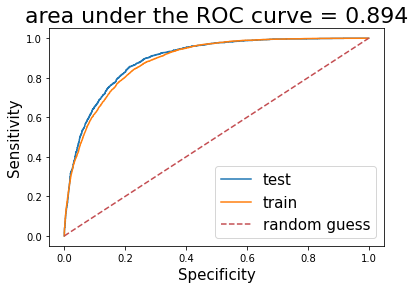

In [221]:

def find_best_threshold(thresholds, fpr, tpr):
    """
    find the best threshold from the roc curve. by finding the threshold for the point which is closest to (fpr=0,tpr=1)
    """
    fpr_tpr = pd.DataFrame({'thresholds': thresholds, 'fpr': fpr, 'tpr': tpr})
    fpr_tpr['dist'] = (fpr_tpr['fpr'])**2 + (fpr_tpr['tpr']-1)**2
    return fpr_tpr.loc[fpr_tpr.dist.argmin(), 'thresholds']





def get_model_results(model, x_train, x_test, y_train, y_test):
    probabilities = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    threshold = find_best_threshold(thresholds, fpr, tpr)
    predictions = probabilities>threshold
    plt.figure()
    plt.rcParams['figure.figsize'] = [15,12]
    plt.style.use("default")
    plt.xlabel("Specificity", fontsize = 15)
    plt.ylabel("Sensitivity", fontsize = 15)
    plt.plot(fpr, tpr, label='test')
    roc_auc = roc_auc_score(y_test, probabilities)
    probabilities = model.predict_proba(x_train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_train, probabilities)
    plt.plot(fpr, tpr, label='train')
    plt.plot([0, 1], [0, 1], 'r--', label='random guess')
    plt.title("area under the ROC curve = {:.3f}".format(roc_auc), fontsize=22);
    print(classification_report(y_test, predictions))
    plt.legend(fontsize=15)

model = LogisticRegression()
model.fit(x_train, y_train)
get_model_results(model, x_train, x_test, y_train, y_test)



# LOGISTIC REGRESSION MODEL

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4530
           1       0.57      0.85      0.68      1502

    accuracy                           0.80      6032
   macro avg       0.76      0.82      0.77      6032
weighted avg       0.85      0.80      0.81      6032



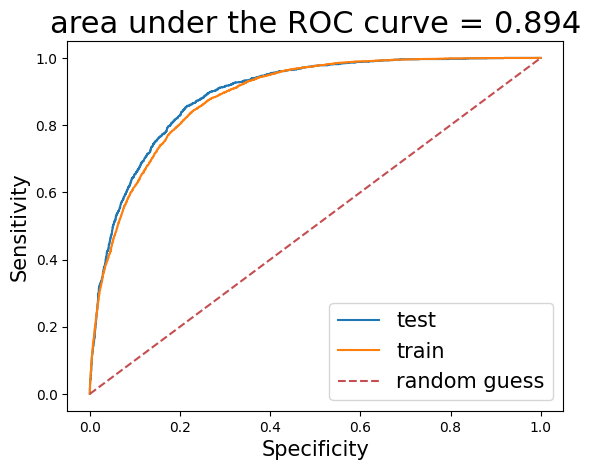

In [222]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=42)
model_1 = logistic.fit(x_train, y_train)

get_model_results(model_1, x_train, x_test, y_train, y_test)
pred_1 = model_1.predict(x_test)




In [223]:
importance = model_1.coef_[0]

Feature: 0, Score: 0.17221
Feature: 1, Score: -1.43152
Feature: 2, Score: 0.40946
Feature: 3, Score: 0.20886
Feature: 4, Score: 0.63719
Feature: 5, Score: 0.75738
Feature: 6, Score: 0.31369
Feature: 7, Score: 0.51085
Feature: 8, Score: -0.52199
Feature: 9, Score: 0.41768
Feature: 10, Score: 0.87475
Feature: 11, Score: -0.14452
Feature: 12, Score: 0.57081
Feature: 13, Score: 1.03560
Feature: 14, Score: 0.02905
Feature: 15, Score: 0.89521
Feature: 16, Score: -0.18019
Feature: 17, Score: 0.60585
Feature: 18, Score: -1.12447
Feature: 19, Score: -0.93750
Feature: 20, Score: -0.49981
Feature: 21, Score: -1.12158
Feature: 22, Score: 0.26714
Feature: 23, Score: -0.84153
Feature: 24, Score: -1.20907
Feature: 25, Score: -1.87163
Feature: 26, Score: -0.91593
Feature: 27, Score: 1.25262
Feature: 28, Score: 0.08821
Feature: 29, Score: 0.16844
Feature: 30, Score: -0.77475


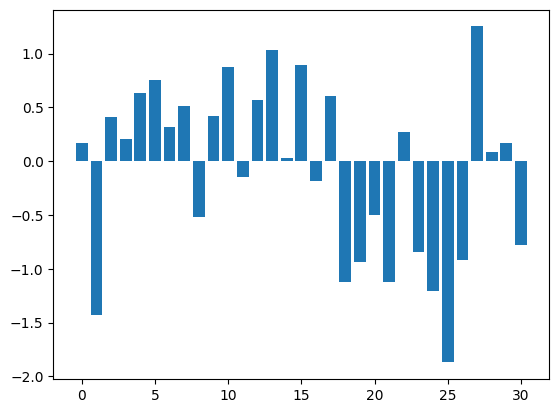

In [224]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [225]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   education.num                 30162 non-null  int64  
 1   age_log                       30162 non-null  float64
 2   age_disccretised              30162 non-null  int32  
 3   dic_work_hours                30162 non-null  int32  
 4   Capital Diff                  30162 non-null  int64  
 5   workclass_Federal-gov         30162 non-null  uint8  
 6   workclass_Private             30162 non-null  uint8  
 7   workclass_Self-emp-inc        30162 non-null  uint8  
 8   education_ School             30162 non-null  uint8  
 9   education_Bachelors           30162 non-null  uint8  
 10  education_Doctorate           30162 non-null  uint8  
 11  education_HS-grad             30162 non-null  uint8  
 12  education_Masters             30162 non-null  uint8  
 13  e

# RANDOM FOREST CLASSIFIER

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      4530
           1       0.55      0.82      0.66      1502

    accuracy                           0.79      6032
   macro avg       0.74      0.80      0.75      6032
weighted avg       0.84      0.79      0.80      6032



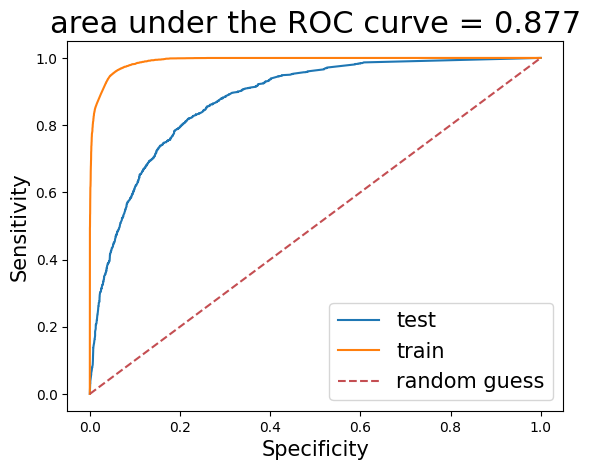

In [226]:
from sklearn.ensemble import RandomForestClassifier
R_forest = RandomForestClassifier(random_state=42)
#R_forest = RandomForestClassifier(n_estimators = 200,criterion = 'entropy', random_state=42)

model_2 = R_forest.fit(x_train, y_train)

get_model_results(model_2, x_train, x_test, y_train, y_test)
pred_2 = model_2.predict(x_test)



# Support Vector Classifier (SVM)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4530
           1       0.58      0.85      0.69      1502

    accuracy                           0.81      6032
   macro avg       0.76      0.82      0.77      6032
weighted avg       0.85      0.81      0.82      6032



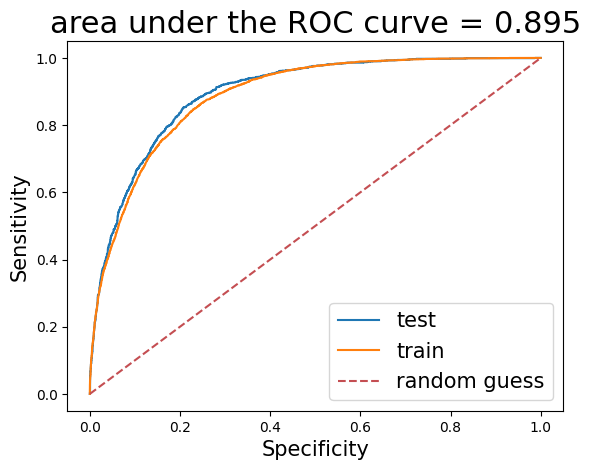

In [227]:
svc = SVC(probability = True,random_state=42)
model_3 = svc.fit(x_train, y_train)

# Predictions
get_model_results(model_3, x_train, x_test, y_train, y_test)
pred_3 = model_3.predict(x_test)



# KNN

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4530
           1       0.65      0.61      0.63      1502

    accuracy                           0.82      6032
   macro avg       0.76      0.75      0.76      6032
weighted avg       0.82      0.82      0.82      6032



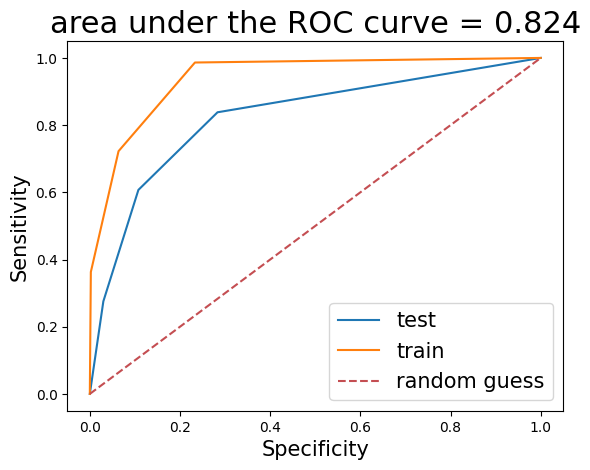

In [228]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
model_4 = knn.fit(x_train, y_train)

# Predictions
get_model_results(model_4, x_train, x_test, y_train, y_test)
pred_4 = knn.predict(x_test)


# Decision Tree algorithm

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4530
           1       0.52      0.67      0.59      1502

    accuracy                           0.77      6032
   macro avg       0.70      0.73      0.71      6032
weighted avg       0.79      0.77      0.77      6032



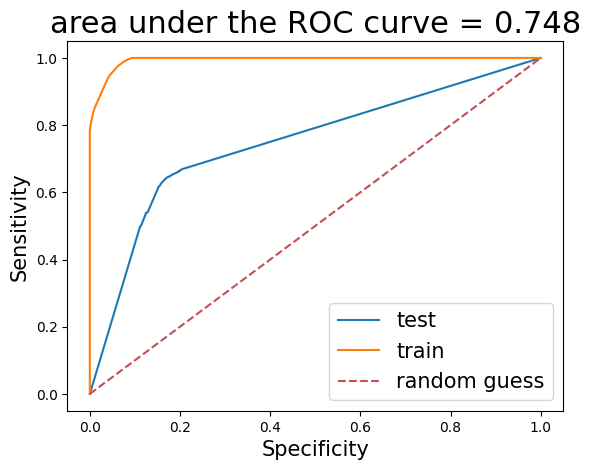

In [229]:
decision_tree = DecisionTreeClassifier(random_state=42)
model_5 = decision_tree.fit(x_train, y_train)

# Predictions
get_model_results(model_5, x_train, x_test, y_train, y_test)
pred_5= decision_tree.predict(x_test)


## Analysis of the model performances¶

In [230]:
# list_pred = [pred_1, pred_2, pred_3, pred_4, pred_6]
# model_names = ["Logistic Regression", "Random Forest Classifier", "SVC",'KNN','Decision Tree']

# for i, predictions in enumerate(list_pred) :
#     print ("Classification Report of ", model_names[i])
#     print ()
#     print (classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))

In [231]:
# for i, pred in enumerate(list_pred) :
#     print ("The Confusion Matrix of : ", model_names[i])
#     print (pd.DataFrame(confusion_matrix(y_test, pred)))
#     print ()

# ROC Curve for the classification models

In [232]:
# ROC Curve for the classification models

# models = [model_1, model_2, model_3, model_4, model_6]

# # Setting the parameters for the ROC Curve
# plt.rcParams['figure.figsize'] = [15,12]
# color = ['purple', 'blue',  'fuchsia', 'cyan','yellow']
# plt.title("ROC CURVE", fontsize = 22)

# i = 1

# for i, model in enumerate(models) :
#     prob = model.predict_proba(x_test)
#     prob_positive = prob[:,1]
#     fpr, tpr, threshold = roc_curve(y_test, prob_positive)
#     plt.plot(fpr, tpr, color = color[i])
#     plt.gca().legend(model_names, loc = 'lower right',fontsize='18', frameon = True)

# plt.plot([0,1],[0,1], linestyle = '--', color = 'red')
# plt.show()

# Improve Logistic regression

In [233]:
# from sklearn.linear_model import LogisticRegression
# logistic = make_pipeline(PolynomialFeatures(),LogisticRegression(random_state=42))
# LG_Poly = logistic.fit(x_train, y_train)

# # Predictions
# y_pred_1 = LG_Poly.predict(x_test)
# pred_1
# get_model_results(LG_Poly, x_train, x_test, y_train, y_test)


              precision    recall  f1-score   support

           0       0.94      0.79      0.86      4530
           1       0.57      0.85      0.68      1502

    accuracy                           0.81      6032
   macro avg       0.76      0.82      0.77      6032
weighted avg       0.85      0.81      0.82      6032



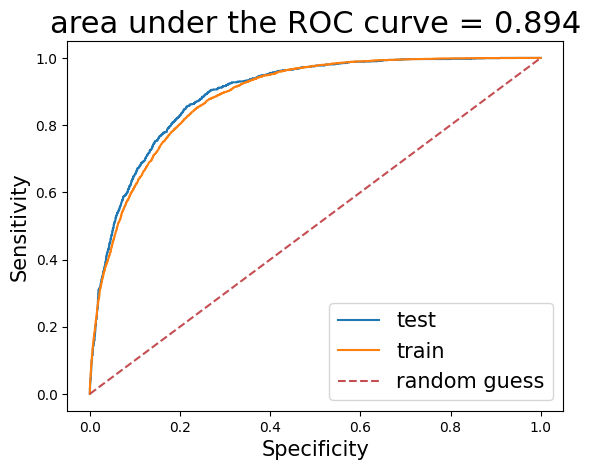

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params_LG = {'penalty': ['l2','l1'], 'C': [0.1, 1, 10, 100],'fit_intercept': [False, True]}
LGgscv = GridSearchCV(LogisticRegression(random_state=42), params_LG, scoring='roc_auc', cv=3)
LGgscv.fit(x_train, y_train)
get_model_results(LGgscv, x_train, x_test, y_train, y_test)
# print(LGgscv.best_params_)

In [235]:
print(LGgscv.best_params_)

{'C': 0.1, 'fit_intercept': True, 'penalty': 'l2'}


In [236]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24130 entries, 1 to 32559
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   education.num                 24130 non-null  int64  
 1   age_log                       24130 non-null  float64
 2   age_disccretised              24130 non-null  int32  
 3   dic_work_hours                24130 non-null  int32  
 4   Capital Diff                  24130 non-null  int64  
 5   workclass_Federal-gov         24130 non-null  uint8  
 6   workclass_Private             24130 non-null  uint8  
 7   workclass_Self-emp-inc        24130 non-null  uint8  
 8   education_ School             24130 non-null  uint8  
 9   education_Bachelors           24130 non-null  uint8  
 10  education_Doctorate           24130 non-null  uint8  
 11  education_HS-grad             24130 non-null  uint8  
 12  education_Masters             24130 non-null  uint8  
 13  e

In [237]:
numerical_columns=['education.num','age_log','age_disccretised','dic_work_hours','Capital Diff']

In [238]:
poly = PolynomialFeatures(2)
train_poly_features = poly.fit_transform(x_train[numerical_columns])
test_poly_features = poly.transform(x_test[numerical_columns])
train_with_poly_features = pd.concat([x_train.reset_index(drop=True),pd.DataFrame(train_poly_features)],axis=1)
test_with_poly_features = pd.concat([x_test.reset_index(drop=True),pd.DataFrame(test_poly_features)],axis=1)

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      4530
           1       0.60      0.83      0.70      1502

    accuracy                           0.82      6032
   macro avg       0.77      0.82      0.79      6032
weighted avg       0.85      0.82      0.83      6032



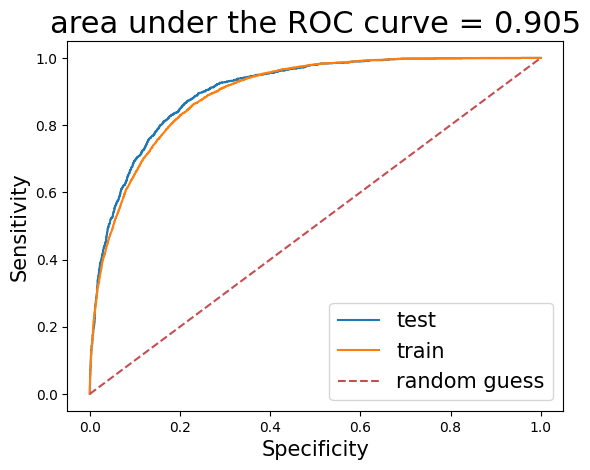

In [239]:
LG_pol=make_pipeline(PolynomialFeatures(), LogisticRegression(C= 0.1, fit_intercept= True, penalty= 'l2',random_state=42))
LG_pol.fit(x_train, y_train)
get_model_results(LG_pol, x_train, x_test, y_train, y_test)


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      4530
           1       0.61      0.84      0.71      1502

    accuracy                           0.83      6032
   macro avg       0.78      0.83      0.79      6032
weighted avg       0.86      0.83      0.84      6032



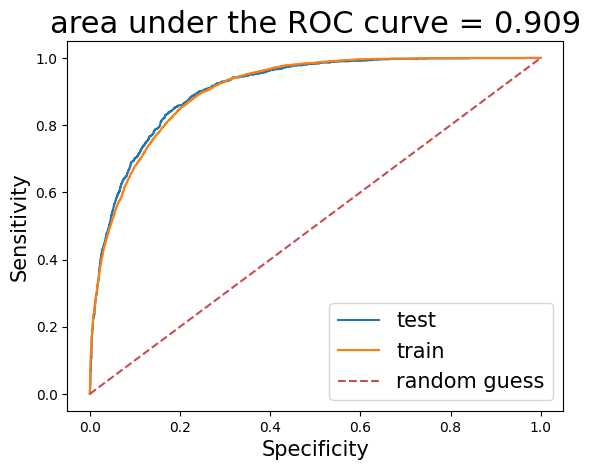

In [240]:
LG_with_scaler = make_pipeline(MinMaxScaler(),PolynomialFeatures(),LogisticRegression( random_state=42))
LG_with_scaler.fit(x_train, y_train)

# Predictions
y_pred_LG_norm = LG_with_scaler.predict(x_test)

get_model_results(LG_with_scaler, x_train, x_test, y_train, y_test)

In [241]:
# feature_importance = pd.Series(index=x_train.columns , data= LG_with_scaler.named_steps['logisticregression'].coef_[0])
# feature_importance = feature_importance.sort_values()

# #plot figure
# plt.figure(figsize=(14,5))
# feature_importance.tail(10).plot.barh(fontsize=16,color='b' )
# plt.figure(figsize=(14,5))
# feature_importance.head(10).plot.barh(fontsize=16, figsize=(14,7), color='r')

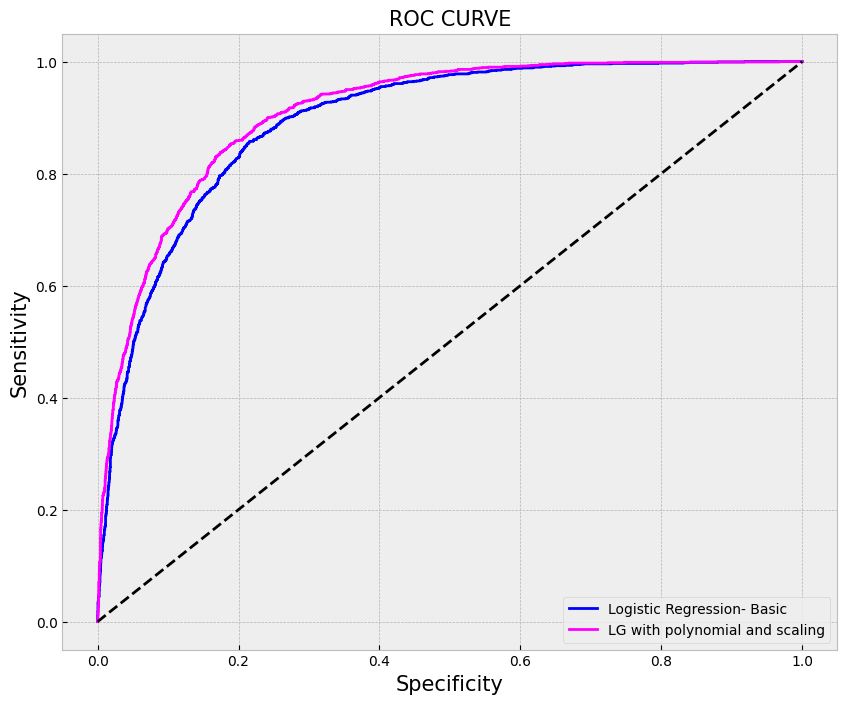

In [242]:
improved_model = [model_1, LG_with_scaler]
improved_model_names = ["Logistic Regression- Basic",  "LG with polynomial and scaling"]

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['blue', 'fuchsia', 'cyan']#,'yellow']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(improved_model) :
    prob = model.predict_proba(x_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(improved_model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()

# Improve Random Forest

In [243]:
params_rf = {'n_estimators': [50,100,200,1000], 'bootstrap': [True, False],'min_samples_split': [10,15,20], 'max_features':[2,3,5]}
RFgscv = GridSearchCV(RandomForestClassifier(random_state=42), params_rf, scoring='roc_auc', cv=3)
RFgscv.fit(x_train, y_train)
print(RFgscv.best_params_)


{'bootstrap': True, 'max_features': 3, 'min_samples_split': 20, 'n_estimators': 1000}


In [244]:
# {'bootstrap': True, 'max_features': 3, 'min_samples_split': 20, 'n_estimators': 1000}


              precision    recall  f1-score   support

           0       0.94      0.82      0.87      4530
           1       0.60      0.84      0.70      1502

    accuracy                           0.82      6032
   macro avg       0.77      0.83      0.79      6032
weighted avg       0.86      0.82      0.83      6032



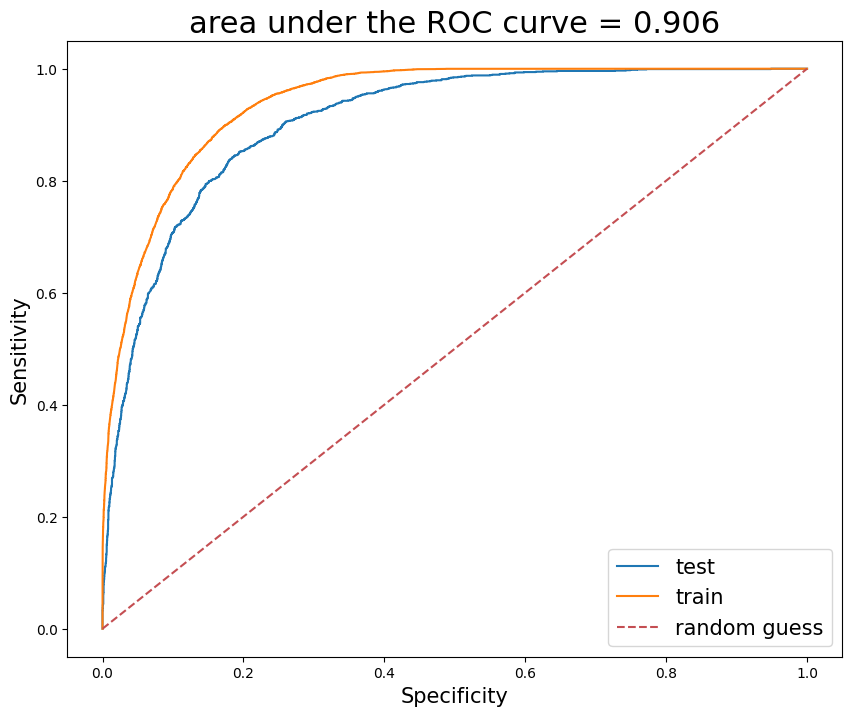

In [245]:
get_model_results(RFgscv, x_train, x_test, y_train, y_test)


In [246]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24130 entries, 1 to 32559
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   education.num                 24130 non-null  int64  
 1   age_log                       24130 non-null  float64
 2   age_disccretised              24130 non-null  int32  
 3   dic_work_hours                24130 non-null  int32  
 4   Capital Diff                  24130 non-null  int64  
 5   workclass_Federal-gov         24130 non-null  uint8  
 6   workclass_Private             24130 non-null  uint8  
 7   workclass_Self-emp-inc        24130 non-null  uint8  
 8   education_ School             24130 non-null  uint8  
 9   education_Bachelors           24130 non-null  uint8  
 10  education_Doctorate           24130 non-null  uint8  
 11  education_HS-grad             24130 non-null  uint8  
 12  education_Masters             24130 non-null  uint8  
 13  e

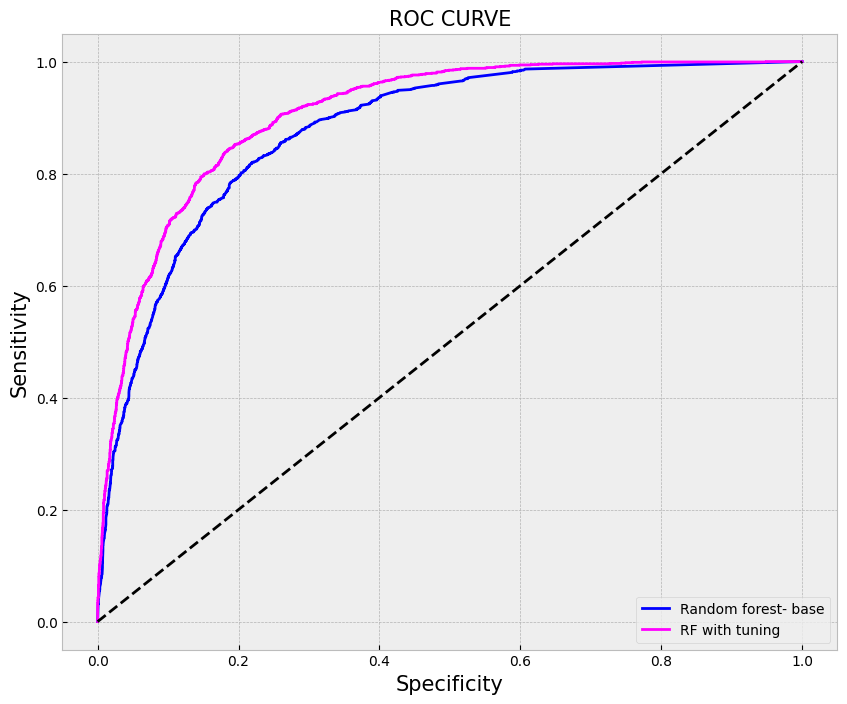

In [247]:
improved_model_RF = [model_2, RFgscv] #,R_forest_poly2,RF_with_scaler
improved_model_names_RF = ["Random forest- base", "RF with tuning"]

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['blue', 'fuchsia']#,'yellow']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(improved_model_RF) :
    prob = model.predict_proba(x_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(improved_model_names_RF, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()

# Hyper parameter for DT

In [248]:
params_dt = {'criterion': ['giny', 'entropy'], 'max_depth': [6,7,8,9],'min_samples_split': [20,50,100,200], 'max_features':[2,3,5]}
DTgscv = GridSearchCV(RandomForestClassifier(random_state=42), params_dt, scoring='roc_auc', cv=3)
DTgscv.fit(x_train, y_train)
print(DTgscv.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 2, 'min_samples_split': 50}


              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4530
           1       0.60      0.84      0.70      1502

    accuracy                           0.82      6032
   macro avg       0.77      0.83      0.78      6032
weighted avg       0.85      0.82      0.83      6032



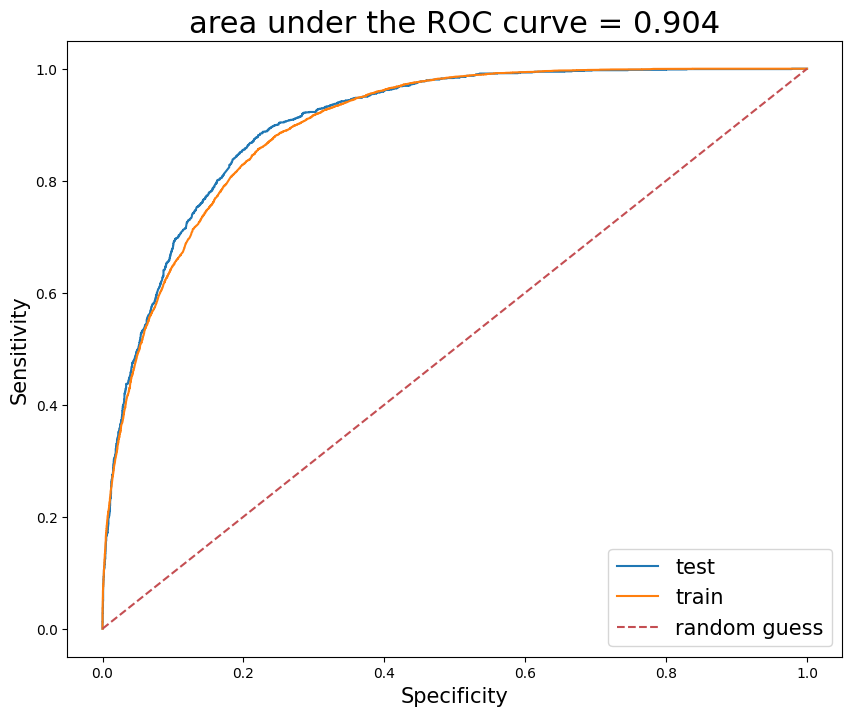

In [249]:
get_model_results(DTgscv, x_train, x_test, y_train, y_test)


#  Hyper paramet for SVC

In [250]:
params_SVC = {'C': [100,500,1000], 'kernel': ['poly', 'rbf', 'sigmoid']} 
# 'gamma': ['scale',1]
SVCgs = GridSearchCV(SVC(probability=True), params_SVC, scoring='roc_auc', cv=3)
SVCgs.fit(x_train, y_train)
print(SVCgs.best_params_)

{'C': 100, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.93      0.83      0.88      4530
           1       0.61      0.82      0.70      1502

    accuracy                           0.83      6032
   macro avg       0.77      0.83      0.79      6032
weighted avg       0.85      0.83      0.83      6032



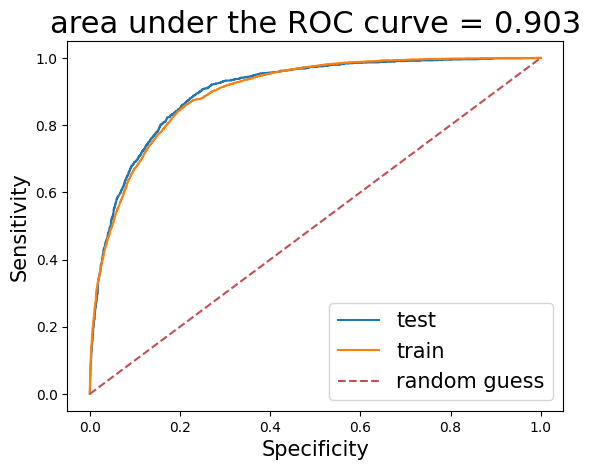

In [251]:
get_model_results(SVCgs, x_train, x_test, y_train, y_test)

##  Hyper paramet for KNN

In [252]:
params_knn = {'n_neighbors': [3,4,6,8], 'weights': ['uniform','distance'],'algorithm': ['auto', 'ball_tree', 'kd_tree','brute']}
KNNgs = GridSearchCV(KNeighborsClassifier(), params_knn, scoring='roc_auc', cv=3)
KNNgs.fit(x_train, y_train)
print(KNNgs.best_params_)

{'algorithm': 'brute', 'n_neighbors': 8, 'weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.89      0.88      0.89      4530
           1       0.66      0.67      0.66      1502

    accuracy                           0.83      6032
   macro avg       0.77      0.78      0.77      6032
weighted avg       0.83      0.83      0.83      6032



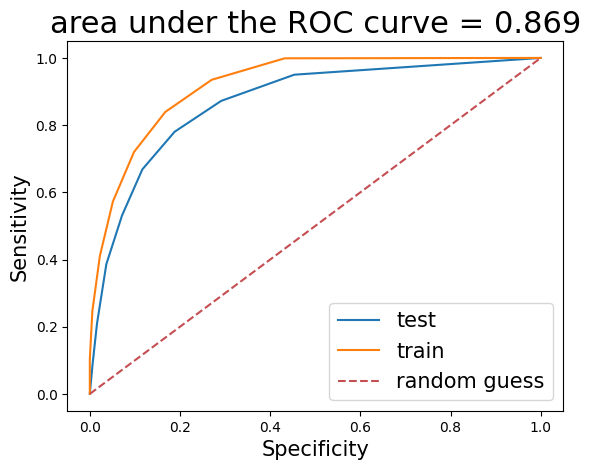

In [253]:
get_model_results(KNNgs, x_train, x_test, y_train, y_test)

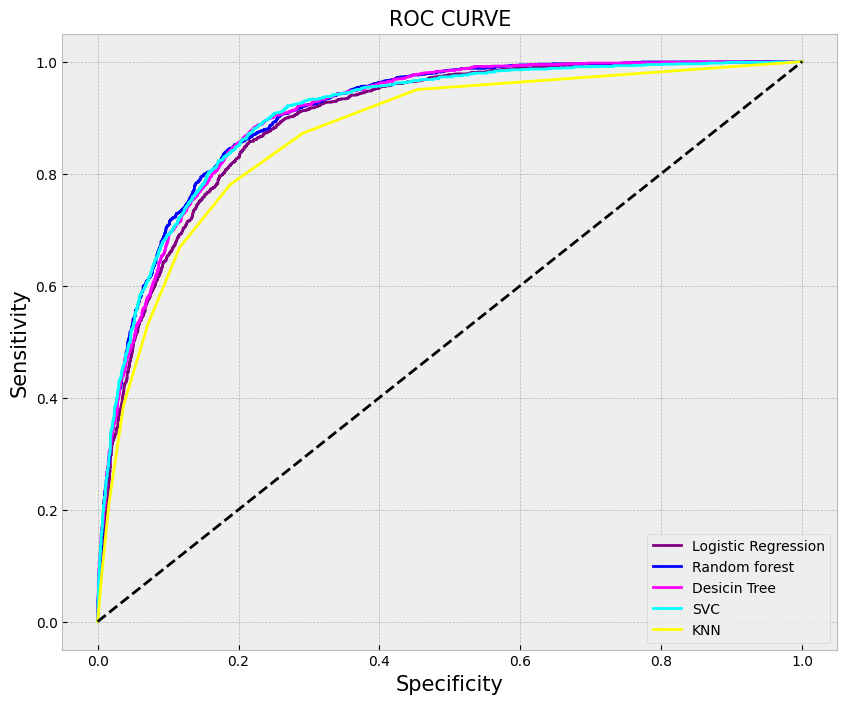

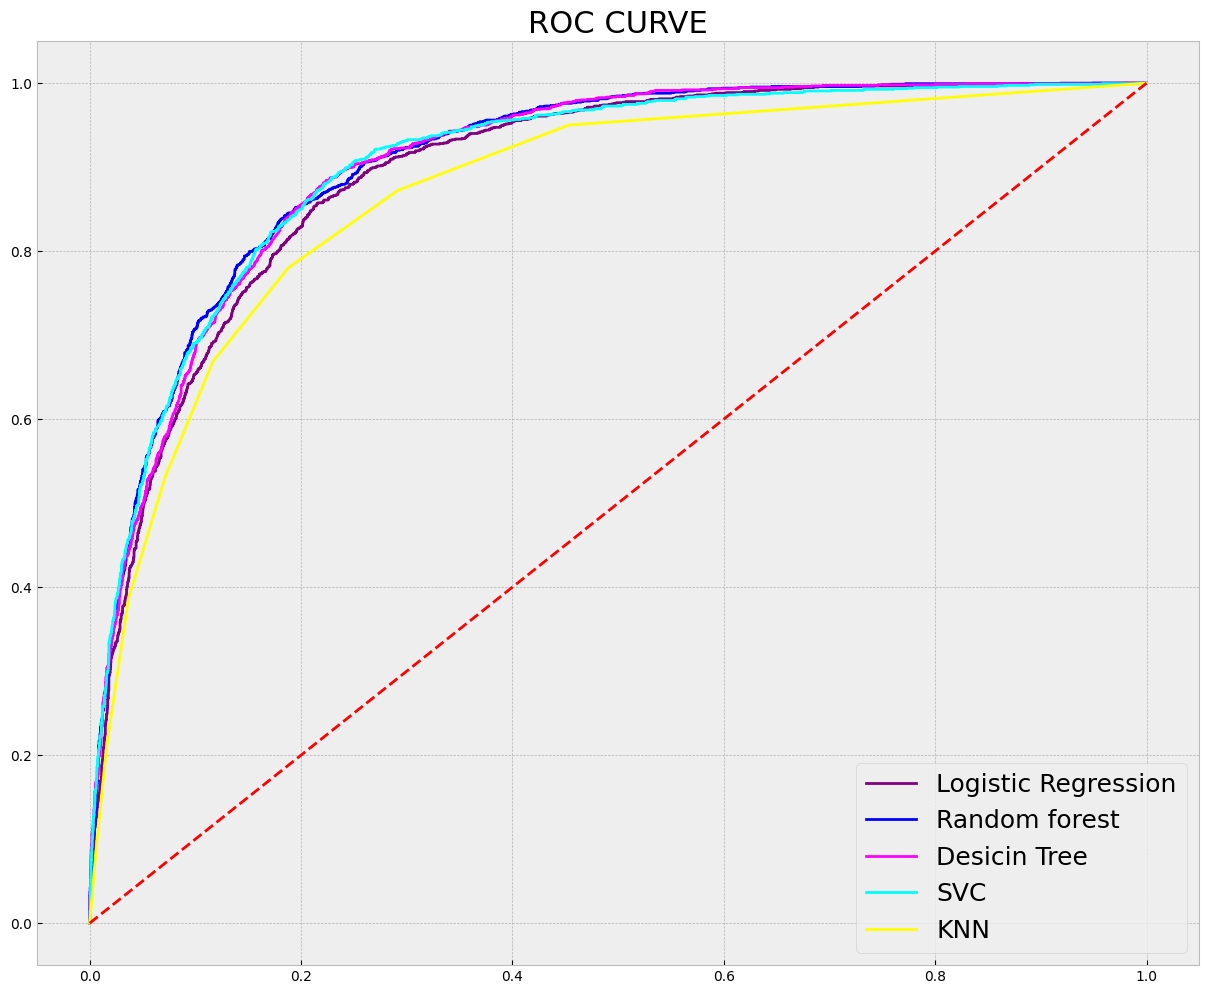

In [254]:
models = [model_1, RFgscv, DTgscv, SVCgs, KNNgs]
improved_model_names = ["Logistic Regression","Random forest", "Desicin Tree", "SVC", "KNN"]

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = ['purple', 'blue',  'fuchsia', 'cyan','yellow']
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("Specificity", fontsize = 15)
plt.ylabel("Sensitivity", fontsize = 15)
i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(x_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(improved_model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()





# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [15,12]
color = ['purple', 'blue',  'fuchsia', 'cyan','yellow']
plt.title("ROC CURVE", fontsize = 22)

i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(x_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(improved_model_names, loc = 'lower right',fontsize='18', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'red')
plt.show()